<font color=#760202><center><h1>Projet 9</h1></center> <center><h3>Produisez une étude de marché</h3></center> <center><h4>(Partie 1)<h4><center>

# <font color=#2921CA> I - Importation des données

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Initialement, j'avais à ma disposition 2 fichiers csv comprenant des données sur la disponibilité alimentaire et la population mondiale

J'ai également chercher à obtenir plus de données (via FAOSTAT et la banque mondiale de donnée), afin d'avoir plus de variables "intéressantes" pour mener à bien cette étude

In [2]:
dispo = pd.read_csv("C:\\Users\\narab\\OneDrive\\Documents\\OpenClassRooms\\Projet 9\\DisponibiliteAlimentaire_2017.csv")
pop = pd.read_csv("C:\\Users\\narab\\OneDrive\\Documents\\OpenClassRooms\\Projet 9\\Population_2000_2018.csv")
logistique = pd.read_csv("C:\\Users\\narab\\OneDrive\\Documents\\OpenClassRooms\\Projet 9\\donnee sup\\Indice_logistique.csv",sep=';')
prix_conso = pd.read_csv("C:\\Users\\narab\\OneDrive\\Documents\\OpenClassRooms\\Projet 9\\donnee sup\\FAOSTAT_prix_conso.csv")
distance = pd.read_csv("C:\\Users\\narab\\OneDrive\\Documents\\OpenClassRooms\\Projet 9\\donnee sup\\Distance_france.csv",sep=";")
pib_stabilite = pd.read_csv("C:\\Users\\narab\\OneDrive\\Documents\\OpenClassRooms\\Projet 9\\donnee sup\\FAOSTAT_pib_stabilite.csv")
import_poulet = pd.read_csv("C:\\Users\\narab\\OneDrive\\Documents\\OpenClassRooms\\Projet 9\\donnee sup\\FAOSTAT_import_poulet.csv",sep=',')

&nbsp;

###  <font color=#009F0C> A - Dispo
    


Je commence par regarder le dataframe corresopndant aux données de la disponibilité alimentaire

In [3]:
dispo.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [4]:
dispo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [5]:
dispo['Code zone'] = dispo['Code zone'].astype('category')
dispo['Code Élément'] = dispo['Code Élément'].astype('category')
dispo['Code Produit'] = dispo['Code Produit'].astype('category')
dispo['Code année'] = dispo['Code année'].astype('category')
dispo['Année'] = dispo['Année'].astype('category')

In [6]:
dispo.describe(include='all')

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
count,176600,176600,176600.0,176600,176600.0,176600,176600.0,176600,176600.0,176600.0,176600,176600.000000,176600,176600
unique,1,1,174.0,174,17.0,17,98.0,98,1.0,1.0,4,NaN,2,2
top,FBS,Nouveaux Bilans Alimentaire,39.0,Tchad,5301.0,Disponibilité intérieure,2514.0,Maïs et produits,2017.0,2017.0,Milliers de tonnes,NaN,S,Données standardisées
freq,176600,176600,1416.0,1416,15905.0,15905,2593.0,2593,176600.0,176600.0,118487,NaN,118487,118487
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.554918,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4762.047787,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10388.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.120000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.462500,NaN,NaN


Il y a dans ce dataframe plusieurs couples de variables donnant une redondance d'information (les variables commençant par 'Code' sont toutes associées à une autre variable, également Symbole et Description symbole)

Ensuite, il y a des variables qui ne seront pas utiles pour la suite, comme 'Domaine' et 'Année' qui sont uniques

In [7]:
dispo['Élément'].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure',
       'Aliments pour animaux', 'Semences', 'Pertes', 'Résidus',
       'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Alimentation pour touristes'], dtype=object)

In [8]:
dispo['Produit'].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [9]:
dispo['Unité'].unique()

array(['Milliers de tonnes', 'kg', 'Kcal/personne/jour',
       'g/personne/jour'], dtype=object)

In [10]:
dispo['Description du Symbole'].unique()

array(['Données standardisées', 'Donnée calculée'], dtype=object)

Le couple 'Symbole' n'apporte pas d'informations utile pour l'étude et pourra être supprimer 

La variable 'Élément' regroupe tout les éléments de la disponibilité intérieure et alimentaire. Pour l'étude, tout ces éléments ne seront pas utiles et je garderai ceux qui me semblent pertinents : Disponibilité intérieure, Production, Exportation, Importation et Nourriture

La variable 'Produit' regroupe tout les différents types de produits alimentaires. Evidemment, ce qui m'intéresse ici c'est les produits de type Viande de Volailles, mais également la somme de l'ensemble des produits

La variable 'Unité' indique différentes unités et donc il faudra éventuellement faire des conversions si besoin

In [11]:
dispo = dispo[['Zone','Élément','Produit','Unité','Valeur']]
dispo2 = dispo.loc[dispo['Élément'].isin(['Production','Importations - Quantité','Exportations - Quantité',
                                          'Disponibilité intérieure','Nourriture'])]

In [12]:
dispo2.head(5)

,Zone,Élément,Produit,Unité,Valeur
0,Afghanistan,Production,Blé et produits,Milliers de tonnes,4281.0
1,Afghanistan,Importations - Quantité,Blé et produits,Milliers de tonnes,2302.0
3,Afghanistan,Exportations - Quantité,Blé et produits,Milliers de tonnes,0.0
4,Afghanistan,Disponibilité intérieure,Blé et produits,Milliers de tonnes,6701.0
9,Afghanistan,Nourriture,Blé et produits,Milliers de tonnes,5640.0


In [13]:
dispo2['Unité'].unique()

array(['Milliers de tonnes'], dtype=object)

Après ce 1er nettoyage, il ne reste plus qu'une valeur dans 'Unité', qu'on pourra donc enlever

Ensuite, j'aimerai avoir les différentes valeurs de 'Élément' en variable et n'avoir les valeurs que pour Viandes de Volailles et pour le total

In [14]:
dispo_tot = dispo2.groupby(by=['Zone','Élément'],as_index=False).sum()
dispo_tot = dispo_tot.pivot_table(index='Zone',values='Valeur',columns='Élément')
dispo_tot = dispo_tot.reset_index()
dispo_tot.head()

Élément,Zone,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
0,Afghanistan,15139.0,601.0,4555.0,12968.0,11609.0
1,Afrique du Sud,66840.0,10968.0,9020.0,31726.0,68455.0
2,Albanie,4879.0,156.0,884.0,3631.0,4231.0
3,Algérie,45365.0,743.0,19718.0,33056.0,26763.0
4,Allemagne,174960.0,58793.0,66550.0,77988.0,167828.0


In [15]:
dispo_vol = dispo2.loc[dispo2['Produit']=='Viande de Volailles'].groupby(by=['Zone','Élément'],as_index=False).sum()
dispo_vol = dispo_vol.pivot_table(index='Zone',values='Valeur',columns='Élément')
dispo_vol = dispo_vol.reset_index()
dispo_vol.head()

Élément,Zone,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
0,Afghanistan,57.0,NaN,29.0,55.0,28.0
1,Afrique du Sud,2118.0,63.0,514.0,2035.0,1667.0
2,Albanie,47.0,0.0,38.0,47.0,13.0
3,Algérie,277.0,0.0,2.0,264.0,275.0
4,Allemagne,1739.0,646.0,842.0,1609.0,1514.0


In [16]:
dispo_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zone                      174 non-null    object 
 1   Disponibilité intérieure  174 non-null    float64
 2   Exportations - Quantité   174 non-null    float64
 3   Importations - Quantité   174 non-null    float64
 4   Nourriture                174 non-null    float64
 5   Production                174 non-null    float64
dtypes: float64(5), object(1)
memory usage: 8.3+ KB


In [17]:
dispo_vol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zone                      170 non-null    object 
 1   Disponibilité intérieure  170 non-null    float64
 2   Exportations - Quantité   135 non-null    float64
 3   Importations - Quantité   170 non-null    float64
 4   Nourriture                170 non-null    float64
 5   Production                168 non-null    float64
dtypes: float64(5), object(1)
memory usage: 8.1+ KB


Maintenant que j'ai mes 2 dataframes souhaités, je vais faire une jointure pour regrouper toutes les données

Cependant, on peut voir que les 2 dataframes n'ont pas le même nombre de lignes et qu'il y a des valeurs nulles pour celui des volailles. Que ce soit pour les valeurs nulles ou les 4 lignes en moins dans celui des volailles, l'explication est simple, il n'y avait pas de lignes pour le produit Viande de Volailles dans 'Dispo' et on pourra remplacer toutes ces valeurs nulles par 0 (de même pour les 4 pays manquants après avoir effectué la jointure)

In [18]:
bdd = pd.merge(dispo_tot,dispo_vol,on='Zone',how='outer')
bdd.fillna(0,inplace=True)
bdd.rename(columns={'Zone':'Pays','Nourriture_x':'Nour tot','Nourriture_y':'Nour vol','Disponibilité intérieure_x':'DI tot',
                    'Exportations - Quantité_x':'Export tot','Importations - Quantité_x':'Import tot',
                    'Production_x':'Prod tot','Disponibilité intérieure_y':'DI vol','Exportations - Quantité_y':'Export vol',
                   'Importations - Quantité_y':'Import vol','Production_y':'Prod vol'},inplace=True)
bdd.head()

Élément,Pays,DI tot,Export tot,Import tot,Nour tot,Prod tot,DI vol,Export vol,Import vol,Nour vol,Prod vol
0,Afghanistan,15139.0,601.0,4555.0,12968.0,11609.0,57.0,0.0,29.0,55.0,28.0
1,Afrique du Sud,66840.0,10968.0,9020.0,31726.0,68455.0,2118.0,63.0,514.0,2035.0,1667.0
2,Albanie,4879.0,156.0,884.0,3631.0,4231.0,47.0,0.0,38.0,47.0,13.0
3,Algérie,45365.0,743.0,19718.0,33056.0,26763.0,277.0,0.0,2.0,264.0,275.0
4,Allemagne,174960.0,58793.0,66550.0,77988.0,167828.0,1739.0,646.0,842.0,1609.0,1514.0


J'ai maintenant toutes les données en quantités de l'ensemble des produits et uniquement des produits de type volailles

Pour la suite de l'étude, j'aimerais travailler avec les données de quantité des produits volailles et leur proportion par rapport au total (que je ne garderai pas)  

In [19]:
bdd_taux = bdd
bdd_taux['% DI vol'] = bdd_taux['DI vol'] / bdd_taux['DI tot'] * 100
bdd_taux['% Prod vol'] = bdd_taux['Prod vol'] / bdd_taux['Prod tot'] * 100
bdd_taux['% Export vol'] = bdd_taux['Export vol'] / bdd_taux['Export tot'] * 100
bdd_taux['% Import vol'] = bdd_taux['Import vol'] / bdd_taux['Import tot'] * 100
bdd_taux['% Nour vol'] = bdd_taux['Nour vol'] / bdd_taux['Nour tot'] * 100
bdd_taux.fillna(0,inplace=True)
bdd_taux.drop(columns=['DI tot','Prod tot','Export tot','Import tot','Nour tot'],inplace=True)
bdd_taux.head()

Élément,Pays,DI vol,Export vol,Import vol,Nour vol,Prod vol,% DI vol,% Prod vol,% Export vol,% Import vol,% Nour vol
0,Afghanistan,57.0,0.0,29.0,55.0,28.0,0.376511,0.241192,0.000000,0.636663,0.424121
1,Afrique du Sud,2118.0,63.0,514.0,2035.0,1667.0,3.168761,2.435176,0.574398,5.698448,6.414297
2,Albanie,47.0,0.0,38.0,47.0,13.0,0.963312,0.307256,0.000000,4.298643,1.294409
3,Algérie,277.0,0.0,2.0,264.0,275.0,0.610603,1.027538,0.000000,0.010143,0.798645
4,Allemagne,1739.0,646.0,842.0,1609.0,1514.0,0.993941,0.902114,1.098770,1.265214,2.063138


Le nettoyage de ce premier dataframe est terminé, je vais ensuite regarder les dataframes correspondant aux autres fichiers

###  <font color=#009F0C> B - Population

In [20]:
pop.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [21]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [22]:
pop['Année'] = pop['Année'].astype('category')
pop['Année'].unique()

[2000, 2001, 2002, 2003, 2004, ..., 2014, 2015, 2016, 2017, 2018]
Length: 19
Categories (19, int64): [2000, 2001, 2002, 2003, ..., 2015, 2016, 2017, 2018]

In [23]:
pop.describe(include='all')

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
count,4411,4411,4411.000000,4411,4411.0,4411,4411.0,4411,4411.000000,4411.0,4411,4.411000e+03,4411,4411,258
unique,1,1,NaN,238,NaN,1,NaN,1,NaN,19.0,1,NaN,2,2,1
top,OA,Séries temporelles annuelles,NaN,Afghanistan,NaN,Population totale,NaN,Population-Estimations,NaN,2018.0,1000 personnes,NaN,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
freq,4411,4411,NaN,19,NaN,4411,NaN,4411,NaN,236.0,4411,NaN,4374,4374,258
mean,NaN,NaN,132.202902,NaN,511.0,NaN,3010.0,NaN,2009.068238,NaN,NaN,2.963004e+04,NaN,NaN,NaN
std,NaN,NaN,75.854840,NaN,0.0,NaN,0.0,NaN,5.481539,NaN,NaN,1.238029e+05,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,511.0,NaN,3010.0,NaN,2000.000000,NaN,NaN,7.850000e-01,NaN,NaN,NaN
25%,NaN,NaN,68.000000,NaN,511.0,NaN,3010.0,NaN,2004.000000,NaN,NaN,3.921890e+02,NaN,NaN,NaN
50%,NaN,NaN,132.000000,NaN,511.0,NaN,3010.0,NaN,2009.000000,NaN,NaN,4.764741e+03,NaN,NaN,NaN
75%,NaN,NaN,195.000000,NaN,511.0,NaN,3010.0,NaN,2014.000000,NaN,NaN,1.821548e+04,NaN,NaN,NaN


Ici, le dataframe est de la même forme que le précédent avec la colonne 'Note' en plus

Cette fois-ci, il y a des données pour les années 2000 à 2018. Celles de 'dispo' correspondait à l'année 2017, par conséquent on ne gardera que les populations de 2017 

Les variables 'Élément' et 'Produit' sont uniques avec seulement la population, j'ai juste à garder 'Zone' et 'Valeur' et mon dataframe sera prêt pour la jointure 

In [24]:
pop2017 = pop.loc[pop['Année']==2017]
pop2017 = pop2017[['Zone','Valeur']]
pop2017.rename(columns={'Zone':'Pays','Valeur':'Population'},inplace=True)
pop2017.head()

,Pays,Population
17,Afghanistan,36296.113
36,Afrique du Sud,57009.756
55,Albanie,2884.169
74,Algérie,41389.189
93,Allemagne,82658.409


###  <font color=#009F0C> C - PIB et stabilité politique

In [25]:
pib_stabilite.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,55088.60,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.92,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,4,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,2058.40,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,13860.30,X,Ciffre de sources internationales,NaN


In [26]:
pib_stabilite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            384 non-null    object 
 1   Domaine                 384 non-null    object 
 2   Code zone (M49)         384 non-null    int64  
 3   Zone                    384 non-null    object 
 4   Code Élément            384 non-null    int64  
 5   Élément                 384 non-null    object 
 6   Code Produit            384 non-null    int64  
 7   Produit                 384 non-null    object 
 8   Code année              384 non-null    int64  
 9   Année                   384 non-null    int64  
 10  Unité                   384 non-null    object 
 11  Valeur                  384 non-null    float64
 12  Symbole                 384 non-null    object 
 13  Description du Symbole  384 non-null    object 
 14  Note                    0 non-null      fl

In [27]:
pib_stabilite.describe(include='all')

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
count,384,384,384.000000,384,384.000000,384,384.000000,384,384.0,384.0,384,384.000000,384,384,0.0
unique,1,1,NaN,198,NaN,1,NaN,2,NaN,NaN,2,NaN,1,1,NaN
top,FS,Données de la sécurité alimentaire,NaN,Pays-Bas (Royaume des),NaN,Valeur,NaN,Stabilité politique et absence de violence/ter...,NaN,NaN,indice,NaN,X,Ciffre de sources internationales,NaN
freq,384,384,NaN,2,NaN,384,NaN,197,NaN,NaN,197,NaN,384,384,NaN
mean,NaN,NaN,426.520833,NaN,6125.486979,NaN,21509.726562,NaN,2017.0,2017.0,NaN,10190.173255,NaN,NaN,NaN
std,NaN,NaN,252.791247,NaN,0.500483,NaN,490.973356,NaN,0.0,0.0,NaN,18616.549720,NaN,NaN,NaN
min,NaN,NaN,4.000000,NaN,6125.000000,NaN,21032.000000,NaN,2017.0,2017.0,NaN,-2.940000,NaN,NaN,NaN
25%,NaN,NaN,208.000000,NaN,6125.000000,NaN,21032.000000,NaN,2017.0,2017.0,NaN,0.022500,NaN,NaN,NaN
50%,NaN,NaN,424.000000,NaN,6125.000000,NaN,21032.000000,NaN,2017.0,2017.0,NaN,1.385000,NaN,NaN,NaN
75%,NaN,NaN,642.250000,NaN,6126.000000,NaN,22013.000000,NaN,2017.0,2017.0,NaN,12635.625000,NaN,NaN,NaN


J'ai pu télécharger des données avec le PIB par habitant et la stabilité politique de chaque pays pour l'année 2017

Ici j'ai pour chaque pays, une ligne où 'Produit' correspond au PIB par hab et une autre pour la stabilité politique que je vais transposer en 2 colonnes disctinctes. De la même manière que pour pop, je ne garderai que 'Zone' et 'Valeur'

In [28]:
pib_stabilite = pib_stabilite[['Zone','Produit','Valeur']]
pib_stabilite = pib_stabilite.pivot_table(index='Zone',values='Valeur',columns='Produit')
pib_stabilite = pib_stabilite.reset_index()
pib_stabilite.rename(columns={'Zone':'Pays','PIB par habitant, ($ PPA internationaux constants de 2017)':'PIB hab',
                              'Stabilité politique et absence de violence/terrorisme (indice)':'Stabi poli'},inplace=True)
pib_stabilite.head()

Produit,Pays,PIB hab,Stabi poli
0,Afghanistan,2058.4,-2.80
1,Afrique du Sud,13860.3,-0.28
2,Albanie,12771.0,0.38
3,Algérie,11737.4,-0.92
4,Allemagne,53071.5,0.59


Voilà, ce dataframe est prêt pour les jointures 

###  <font color=#009F0C> D - Logistique

In [29]:
logistique.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2016,2017,2018
0,Aruba,ABW,Indice de performance logistique : performance...,LP.LPI.OVRL.XQ,NaN,NaN,NaN
1,NaN,AFE,Indice de performance logistique : performance...,LP.LPI.OVRL.XQ,2.578623,NaN,2.492222
2,Afghanistan,AFG,Indice de performance logistique : performance...,LP.LPI.OVRL.XQ,2.141282,NaN,1.950000
3,NaN,AFW,Indice de performance logistique : performance...,LP.LPI.OVRL.XQ,2.349977,NaN,2.413333
4,Angola,AGO,Indice de performance logistique : performance...,LP.LPI.OVRL.XQ,2.241183,NaN,2.050000


In [30]:
logistique['Indicator Name'].unique()

array(['Indice de performance logistique : performance globale (1=faible et 5=élevée)'],
      dtype=object)

In [31]:
logistique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   2016            207 non-null    float64
 5   2017            0 non-null      float64
 6   2018            207 non-null    float64
dtypes: float64(3), object(4)
memory usage: 14.7+ KB


Avec ce dataframe, on a des données indiquant un indice de performance logistique commercial, j'ai choisi d'importer cet indice en terme de performance globale et que ces données pourraient être utile pour dans le choix d'un pays

On remarque malheuresement qu'il n y a pas de données pour l'année 2017, mais comme il y en a pour les années 2016 et 2018, je vais tout simplement prendre la moyenne de ces 2 colonnes et transposer les valeurs dans 2017

In [32]:
logistique['2017'] = (logistique['2016']+logistique['2018'])/2
logistique = logistique[['Country Name','Country Code','2017']]
logistique.rename(columns={'Country Name':'Pays','2017':'Perf logist'},inplace=True)

Ensuite je garde uniquement les colonnes dont j'ai besoin pour les jointures et comme on le verra bientôt, j'aurai besoin de la colonne Country Code pour la jointure avec le dataframe 'distance', donc je garde également cette colonne

In [33]:
logistique.head()

,Pays,Country Code,Perf logist
0,Aruba,ABW,NaN
1,NaN,AFE,2.535422
2,Afghanistan,AFG,2.045641
3,NaN,AFW,2.381655
4,Angola,AGO,2.145592


###  <font color=#009F0C> E - Prix conso

In [34]:
prix_conso.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code année,Année,Code Produit,Produit,Code Mois,Mois,Code Élément,Élément,Unité,Valeur,Symbole,Description du Symbole,Note
0,CP,Indices de Prix à la Consommation,528,Pays-Bas (Royaume des),2017,2017,23013,"Prix à la Consommation, Indices d'alimentation...",7001,Janvier,6125,Valeur,indice,101.210000,X,Ciffre de sources internationales,base year is 2015
1,CP,Indices de Prix à la Consommation,528,Pays-Bas (Royaume des),2018,2018,23013,"Prix à la Consommation, Indices d'alimentation...",7001,Janvier,6125,Valeur,indice,103.470000,X,Ciffre de sources internationales,base year is 2015
2,CP,Indices de Prix à la Consommation,4,Afghanistan,2017,2017,23013,"Prix à la Consommation, Indices d'alimentation...",7001,Janvier,6125,Valeur,indice,108.520050,X,Ciffre de sources internationales,base year is 2015
3,CP,Indices de Prix à la Consommation,4,Afghanistan,2018,2018,23013,"Prix à la Consommation, Indices d'alimentation...",7001,Janvier,6125,Valeur,indice,114.527725,X,Ciffre de sources internationales,base year is 2015
4,CP,Indices de Prix à la Consommation,710,Afrique du Sud,2017,2017,23013,"Prix à la Consommation, Indices d'alimentation...",7001,Janvier,6125,Valeur,indice,117.624500,X,Ciffre de sources internationales,base year is 2015


In [35]:
prix_conso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            406 non-null    object 
 1   Domaine                 406 non-null    object 
 2   Code zone (M49)         406 non-null    int64  
 3   Zone                    406 non-null    object 
 4   Code année              406 non-null    int64  
 5   Année                   406 non-null    int64  
 6   Code Produit            406 non-null    int64  
 7   Produit                 406 non-null    object 
 8   Code Mois               406 non-null    int64  
 9   Mois                    406 non-null    object 
 10  Code Élément            406 non-null    int64  
 11  Élément                 406 non-null    object 
 12  Unité                   406 non-null    object 
 13  Valeur                  406 non-null    float64
 14  Symbole                 406 non-null    ob

In [36]:
prix_conso.describe(include='all')

,Code Domaine,Domaine,Code zone (M49),Zone,Code année,Année,Code Produit,Produit,Code Mois,Mois,Code Élément,Élément,Unité,Valeur,Symbole,Description du Symbole,Note
count,406,406,406.000000,406,406.000000,406.000000,406.0,406,406.0,406,406.0,406,406,406.000000,406,406,406
unique,1,1,NaN,203,NaN,NaN,NaN,1,NaN,1,NaN,1,1,NaN,4,4,1
top,CP,Indices de Prix à la Consommation,NaN,Pays-Bas (Royaume des),NaN,NaN,NaN,"Prix à la Consommation, Indices d'alimentation...",NaN,Janvier,NaN,Valeur,indice,NaN,X,Ciffre de sources internationales,base year is 2015
freq,406,406,NaN,2,NaN,NaN,NaN,406,NaN,406,NaN,406,406,NaN,314,314,406
mean,NaN,NaN,425.768473,NaN,2017.500000,2017.500000,23013.0,NaN,7001.0,NaN,6125.0,NaN,NaN,165.174244,NaN,NaN,NaN
std,NaN,NaN,250.180637,NaN,0.500617,0.500617,0.0,NaN,0.0,NaN,0.0,NaN,NaN,955.277129,NaN,NaN,NaN
min,NaN,NaN,4.000000,NaN,2017.000000,2017.000000,23013.0,NaN,7001.0,NaN,6125.0,NaN,NaN,87.819187,NaN,NaN,NaN
25%,NaN,NaN,212.500000,NaN,2017.000000,2017.000000,23013.0,NaN,7001.0,NaN,6125.0,NaN,NaN,101.007428,NaN,NaN,NaN
50%,NaN,NaN,426.000000,NaN,2017.500000,2017.500000,23013.0,NaN,7001.0,NaN,6125.0,NaN,NaN,104.198284,NaN,NaN,NaN
75%,NaN,NaN,641.000000,NaN,2018.000000,2018.000000,23013.0,NaN,7001.0,NaN,6125.0,NaN,NaN,111.958201,NaN,NaN,NaN


In [37]:
prix_conso['Produit'].unique()

array(["Prix à la Consommation, Indices d'alimentation (2015 = 100)"],
      dtype=object)

A partir de ce dataframe, je veux obtenir une variable qui me donnerait l'évolution des prix pour la consommation de produits alimentaires

Ici, j'ai des indices par rapport à 2015, par contre ceux sont des indices établis mensuellement et j'aimerai avoir une seule valeur par pays

J'ai décidé de prendre les valeurs pour janvier 2017 et le janvier 2018. A partir de ces 2 valeurs, je calcule le pourcentage de variation, ce qui me permettra d'avoir un plus ou moins un pourcentage "d'inflation" sur les produits alimentaires pour l'année 2017

In [38]:
prix_conso = prix_conso[['Zone','Année','Valeur']]
prix_conso.head()

,Zone,Année,Valeur
0,Pays-Bas (Royaume des),2017,101.210000
1,Pays-Bas (Royaume des),2018,103.470000
2,Afghanistan,2017,108.520050
3,Afghanistan,2018,114.527725
4,Afrique du Sud,2017,117.624500


In [39]:
prix_conso = prix_conso.pivot_table(values='Valeur',index='Zone',columns='Année')
prix_conso.reset_index(inplace=True)
prix_conso.head()

Année,Zone,2017,2018
0,Afghanistan,108.520050,114.527725
1,Afrique du Sud,117.624500,122.231600
2,Albanie,108.427850,110.870967
3,Algérie,108.044086,110.005846
4,Allemagne,103.200000,105.900000


In [40]:
prix_conso['Inflation'] = 100*(prix_conso[2018]/prix_conso[2017]-1)
prix_conso = prix_conso[['Zone','Inflation']]
prix_conso.rename(columns={'Zone':'Pays'},inplace=True)
prix_conso.head()

Année,Pays,Inflation
0,Afghanistan,5.536005
1,Afrique du Sud,3.916786
2,Albanie,2.253219
3,Algérie,1.815703
4,Allemagne,2.616279


###  <font color=#009F0C> G - Distance

In [41]:
distance.head()

,Column1,Column73
0,,FRA
1,ABW,7677.4868970011585
2,AFG,5594.223376940109
3,AGO,6478.953877303544
4,AIA,6710.883702059914


Ce dataframe regroupe les 'Coundty Code' en première colonne et la distance à vol d'oiseau entre Paris et la capitale du pays concerné en deuxième colonne

In [42]:
distance.rename(columns={'Column1':'Country Code','Column73':'Distance'},inplace=True)

### <font color ='#009F0C'> H) Import poulet

In [43]:
import_poulet.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,TI,Indices commerciaux,528,Pays-Bas (Royaume des),464,Indice de valeur unitaire à l'import (2014-201...,21121,"Viande, poulet, fraîche ou réfrigérée",2017,2017,indice,114,E,Valeur estimée
1,TI,Indices commerciaux,528,Pays-Bas (Royaume des),465,Indice de quantité d'importation (2014-2016 = ...,21121,"Viande, poulet, fraîche ou réfrigérée",2017,2017,indice,123,E,Valeur estimée
2,TI,Indices commerciaux,4,Afghanistan,464,Indice de valeur unitaire à l'import (2014-201...,21121,"Viande, poulet, fraîche ou réfrigérée",2017,2017,indice,80,E,Valeur estimée
3,TI,Indices commerciaux,4,Afghanistan,465,Indice de quantité d'importation (2014-2016 = ...,21121,"Viande, poulet, fraîche ou réfrigérée",2017,2017,indice,72,E,Valeur estimée
4,TI,Indices commerciaux,710,Afrique du Sud,464,Indice de valeur unitaire à l'import (2014-201...,21121,"Viande, poulet, fraîche ou réfrigérée",2017,2017,indice,106,E,Valeur estimée


In [44]:
import_poulet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Code Domaine            388 non-null    object
 1   Domaine                 388 non-null    object
 2   Code zone (M49)         388 non-null    int64 
 3   Zone                    388 non-null    object
 4   Code Élément            388 non-null    int64 
 5   Élément                 388 non-null    object
 6   Code Produit (CPC)      388 non-null    int64 
 7   Produit                 388 non-null    object
 8   Code année              388 non-null    int64 
 9   Année                   388 non-null    int64 
 10  Unité                   388 non-null    object
 11  Valeur                  388 non-null    int64 
 12  Symbole                 388 non-null    object
 13  Description du Symbole  388 non-null    object
dtypes: int64(6), object(8)
memory usage: 42.6+ KB


In [45]:
import_poulet.describe(include='all')

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
count,388,388,388.000000,388,388.000000,388,388.0,388,388.0,388.0,388,388.000000,388,388
unique,1,1,NaN,194,NaN,2,NaN,1,NaN,NaN,1,NaN,1,1
top,TI,Indices commerciaux,NaN,Pays-Bas (Royaume des),NaN,Indice de valeur unitaire à l'import (2014-201...,NaN,"Viande, poulet, fraîche ou réfrigérée",NaN,NaN,indice,NaN,E,Valeur estimée
freq,388,388,NaN,2,NaN,194,NaN,388,NaN,NaN,388,NaN,388,388
mean,NaN,NaN,426.835052,NaN,464.500000,NaN,21121.0,NaN,2017.0,2017.0,NaN,126.922680,NaN,NaN
std,NaN,NaN,253.064594,NaN,0.500646,NaN,0.0,NaN,0.0,0.0,NaN,309.440254,NaN,NaN
min,NaN,NaN,4.000000,NaN,464.000000,NaN,21121.0,NaN,2017.0,2017.0,NaN,2.000000,NaN,NaN
25%,NaN,NaN,208.000000,NaN,464.000000,NaN,21121.0,NaN,2017.0,2017.0,NaN,89.000000,NaN,NaN
50%,NaN,NaN,417.500000,NaN,464.500000,NaN,21121.0,NaN,2017.0,2017.0,NaN,99.000000,NaN,NaN
75%,NaN,NaN,646.000000,NaN,465.000000,NaN,21121.0,NaN,2017.0,2017.0,NaN,115.000000,NaN,NaN


In [46]:
import_poulet['Élément'].unique()

array(["Indice de valeur unitaire à l'import (2014-2016 = 100)",
       "Indice de quantité d'importation (2014-2016 = 100)"], dtype=object)

Ici, je veux extraire 2 variables. Une première indiquant l'évolution par rapport à 2015 du prix unitaire de viandes de poulet importées et la seconde indiquant l'évolution par rapport à 2015 de la quantité de viandes de poulet importées

In [47]:
import_poulet = import_poulet[['Zone','Élément','Valeur']]

In [48]:
import_poulet = import_poulet.pivot_table(index='Zone',values='Valeur',columns='Élément')
import_poulet.reset_index(inplace=True)
import_poulet.head()

Élément,Zone,Indice de quantité d'importation (2014-2016 = 100),Indice de valeur unitaire à l'import (2014-2016 = 100)
0,Afghanistan,72,80
1,Afrique du Sud,128,106
2,Albanie,85,72
3,Algérie,129,55
4,Allemagne,112,95


In [49]:
import_poulet.rename(columns={'Zone':'Pays',"Indice de quantité d'importation (2014-2016 = 100)":'Ind qte import',"Indice de valeur unitaire à l'import (2014-2016 = 100)":'Ind val unit import'},inplace=True)

In [50]:
import_poulet.head()

Élément,Pays,Ind qte import,Ind val unit import
0,Afghanistan,72,80
1,Afrique du Sud,128,106
2,Albanie,85,72
3,Algérie,129,55
4,Allemagne,112,95


# <font color='#2921CA'> II - Jointures

Maintenant que tous dataframes sont nettoyés, ils sont prêts pour l'exécution des jointures

In [51]:
bdd_taux.head()

Élément,Pays,DI vol,Export vol,Import vol,Nour vol,Prod vol,% DI vol,% Prod vol,% Export vol,% Import vol,% Nour vol
0,Afghanistan,57.0,0.0,29.0,55.0,28.0,0.376511,0.241192,0.000000,0.636663,0.424121
1,Afrique du Sud,2118.0,63.0,514.0,2035.0,1667.0,3.168761,2.435176,0.574398,5.698448,6.414297
2,Albanie,47.0,0.0,38.0,47.0,13.0,0.963312,0.307256,0.000000,4.298643,1.294409
3,Algérie,277.0,0.0,2.0,264.0,275.0,0.610603,1.027538,0.000000,0.010143,0.798645
4,Allemagne,1739.0,646.0,842.0,1609.0,1514.0,0.993941,0.902114,1.098770,1.265214,2.063138


In [52]:
pop2017.head()

,Pays,Population
17,Afghanistan,36296.113
36,Afrique du Sud,57009.756
55,Albanie,2884.169
74,Algérie,41389.189
93,Allemagne,82658.409


In [53]:
logistique.head()

,Pays,Country Code,Perf logist
0,Aruba,ABW,NaN
1,NaN,AFE,2.535422
2,Afghanistan,AFG,2.045641
3,NaN,AFW,2.381655
4,Angola,AGO,2.145592


In [54]:
prix_conso.head()

Année,Pays,Inflation
0,Afghanistan,5.536005
1,Afrique du Sud,3.916786
2,Albanie,2.253219
3,Algérie,1.815703
4,Allemagne,2.616279


In [55]:
pib_stabilite.head()

Produit,Pays,PIB hab,Stabi poli
0,Afghanistan,2058.4,-2.80
1,Afrique du Sud,13860.3,-0.28
2,Albanie,12771.0,0.38
3,Algérie,11737.4,-0.92
4,Allemagne,53071.5,0.59


In [56]:
distance.head()

,Country Code,Distance
0,,FRA
1,ABW,7677.4868970011585
2,AFG,5594.223376940109
3,AGO,6478.953877303544
4,AIA,6710.883702059914


In [57]:
import_poulet.head()

Élément,Pays,Ind qte import,Ind val unit import
0,Afghanistan,72,80
1,Afrique du Sud,128,106
2,Albanie,85,72
3,Algérie,129,55
4,Allemagne,112,95


In [58]:
join = pd.merge(logistique,distance,on='Country Code',how='inner')
join = pd.merge(join,prix_conso,on='Pays',how='outer')
join = pd.merge(join,pib_stabilite,on='Pays',how='outer')
join = pd.merge(join,pop2017,on='Pays',how='outer')
join = pd.merge(join,import_poulet,on='Pays',how='outer')
join = pd.merge(bdd_taux,join,on='Pays',how='outer',indicator=True)
join.drop(columns='Country Code',inplace=True)
join.head()

,Pays,DI vol,Export vol,Import vol,Nour vol,Prod vol,% DI vol,% Prod vol,% Export vol,% Import vol,% Nour vol,Perf logist,Distance,Inflation,PIB hab,Stabi poli,Population,Ind qte import,Ind val unit import,_merge
0,Afghanistan,57.0,0.0,29.0,55.0,28.0,0.376511,0.241192,0.000000,0.636663,0.424121,2.045641,5594.223376940109,5.536005,2058.4,-2.80,36296.113,72.0,80.0,both
1,Afrique du Sud,2118.0,63.0,514.0,2035.0,1667.0,3.168761,2.435176,0.574398,5.698448,6.414297,3.577660,9306.63852993811,3.916786,13860.3,-0.28,57009.756,128.0,106.0,both
2,Albanie,47.0,0.0,38.0,47.0,13.0,0.963312,0.307256,0.000000,4.298643,1.294409,2.536249,1603.9445348527308,2.253219,12771.0,0.38,2884.169,85.0,72.0,both
3,Algérie,277.0,0.0,2.0,264.0,275.0,0.610603,1.027538,0.000000,0.010143,0.798645,2.609841,1345.4603968407353,1.815703,11737.4,-0.92,41389.189,129.0,55.0,both
4,Allemagne,1739.0,646.0,842.0,1609.0,1514.0,0.993941,0.902114,1.098770,1.265214,2.063138,4.212983,880.6348377313325,2.616279,53071.5,0.59,82658.409,112.0,95.0,both


Maintenant il reste à voir s'il y a des valeurs nulles et surtout si il n'y a pas de 'doublons' parmi les pays à cause d'une orthographe différente sur les diffénents dataframes joints

In [59]:
join['Pays'].loc[join['_merge']=='right_only'].sort_values().unique()

array(['Andorre', 'Anguilla', 'Antilles néerlandaises (ex)', 'Aruba',
       'Bahreïn', 'Bhoutan', 'Bolivie', 'Bonaire, Saint-Eustache et Saba',
       'Burundi', 'Chine', 'Chine, RAS de Hong Kong',
       'Cisjordanie et Gaza', 'Comores', 'Congo, République du',
       'Congo, République démocratique du', 'Curacao', 'Curaçao',
       'Gibraltar', 'Groenland', 'Guadeloupe', 'Guam',
       'Guinée équatoriale', 'Guyane française',
       'Iran, République islamique d’', 'Libye', 'Liechtenstein',
       'Mariannes', 'Martinique', 'Mayotte',
       'Micronésie (États fédérés de)', 'Micronésie, États fédérés de',
       'Moldova', 'Monaco', 'Montserrat', 'Nauru', 'Nioué', 'Palaos',
       'Palestine', 'Papouasie-Nouvelle-Guinée', 'Pays-Bas (Royaume des)',
       'Porto Rico', 'Qatar', 'Royaume-Uni',
       'Région administrative spéciale de Macao, Chine',
       'République arabe syrienne', 'République démocratique du Congo',
       'République kirghize', 'République slovaque', 'République

In [60]:
bdd_taux['Pays'].sort_values().unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bangladesh', 'Barbade', 'Belgique', 'Belize', 'Bermudes',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brunéi Darussalam', 'Brésil', 'Bulgarie',
       'Burkina Faso', 'Bélarus', 'Bénin', 'Cabo Verde', 'Cambodge',
       'Cameroun', 'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, Taiwan Province de',
       'Chine, continentale', 'Chypre', 'Colombie', 'Congo', 'Costa Rica',
       'Croatie', 'Cuba', "Côte d'Ivoire", 'Danemark', 'Djibouti',
       'Dominique', 'El Salvador', 'Espagne', 'Estonie', 'Eswatini',
       'Fidji', 'Finlande', 'France', 'Fédération de Russie', 'Gabon',
       'Gambie', 'Ghana', 'Grenade', 'Grèce', 'Guatemala', 'Guinée',
       'Guinée-Bissau', 'Guyana', 'Géorgie', 'H

Pour vérifier l'orthographe des pays, je n'ai trouver qu'une solution "à l'oeil nu". En effet j'ai pris la liste des pays qui n'ont pas trouvé de pays identique parmi la liste des pays du dataframe 'dispo', ainsi que cette dernière

En espérant n'avoir oublié aucun pays, j'ai donc listé tous les pays (avec le nom de ceux de 'dispo') : 

- Bolivie (État plurinational de)
- Chine, continentale
- Chine - RAS de Hong-Kong
- Congo
- Iran (République islamique d')
- Pays-Bas
- Royaume-Uni de Grande-Bretagne et d'Irlande du Nord
- République de Moldova
- Chine - RAS de Macao
- Kirghizistan
- Slovaquie
- Tchéquie
- République-Unie de Tanzanie
- Venezuela (République bolivarienne du)
- Yémen
- Égypte
- États-Unis d'Amérique

Ensuite, j'ai simplement renommer les pays de la première liste par ceux de la deuxième dans chacun des dataframes importés. Il y avait probablement une solution plus rapide et moins redondante, mais celle-ci étant fiable, j'ai décidé de la garder et de refaire la même jointure

In [61]:
pib_stabilite.loc[pib_stabilite['Pays']=='Bolivie','Pays']  = 'Bolivie (État plurinational de)'
pib_stabilite.loc[pib_stabilite['Pays']=='Chine','Pays']  = 'Chine, continentale'
pib_stabilite.loc[pib_stabilite['Pays']=='Chine, RAS de Hong Kong','Pays']  = 'Chine - RAS de Hong-Kong'
pib_stabilite.loc[pib_stabilite['Pays']=='Congo, République du','Pays'] = 'Congo'
pib_stabilite.loc[pib_stabilite['Pays']=='Iran, République islamique d’','Pays']  = "Iran (République islamique d')"
pib_stabilite.loc[pib_stabilite['Pays']=='Pays-Bas (Royaume des)','Pays']  = 'Pays-Bas'
pib_stabilite.loc[pib_stabilite['Pays']=='Royaume-Uni','Pays']  = "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"
pib_stabilite.loc[pib_stabilite['Pays']=='Moldova','Pays']  = 'République de Moldova'
pib_stabilite.loc[pib_stabilite['Pays']=='Région administrative spéciale de Macao, Chine','Pays']  = 'Chine - RAS de Macao'
pib_stabilite.loc[pib_stabilite['Pays']=='République kirghize','Pays']  = 'Kirghizistan'
pib_stabilite.loc[pib_stabilite['Pays']=='République slovaque','Pays']  = 'Slovaquie'
pib_stabilite.loc[pib_stabilite['Pays']=='République tchèque','Pays']  = 'Tchéquie'
pib_stabilite.loc[pib_stabilite['Pays']=='Tanzanie','Pays']  = 'République-Unie de Tanzanie'
pib_stabilite.loc[pib_stabilite['Pays']=='Venezuela','Pays']  = 'Venezuela (République bolivarienne du)'
pib_stabilite.loc[pib_stabilite['Pays']=='Yémen, Rép. du','Pays']  = 'Yémen'
pib_stabilite.loc[pib_stabilite['Pays']=='Égypte, République arabe d’','Pays']  = 'Égypte'
pib_stabilite.loc[pib_stabilite['Pays']=='États-Unis','Pays']  = "États-Unis d'Amérique"

In [62]:
logistique.loc[logistique['Pays']=='Bolivie','Pays']  = 'Bolivie (État plurinational de)'
logistique.loc[logistique['Pays']=='Chine','Pays']  = 'Chine, continentale'
logistique.loc[logistique['Pays']=='Chine, RAS de Hong Kong','Pays']  = 'Chine - RAS de Hong-Kong'
logistique.loc[logistique['Pays']=='Congo, République du','Pays'] = 'Congo'
logistique.loc[logistique['Pays']=='Iran, République islamique d’','Pays']  = "Iran (République islamique d')"
logistique.loc[logistique['Pays']=='Pays-Bas (Royaume des)','Pays']  = 'Pays-Bas'
logistique.loc[logistique['Pays']=='Royaume-Uni','Pays']  = "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"
logistique.loc[logistique['Pays']=='Moldova','Pays']  = 'République de Moldova'
logistique.loc[logistique['Pays']=='Région administrative spéciale de Macao, Chine','Pays']  = 'Chine - RAS de Macao'
logistique.loc[logistique['Pays']=='République kirghize','Pays']  = 'Kirghizistan'
logistique.loc[logistique['Pays']=='République slovaque','Pays']  = 'Slovaquie'
logistique.loc[logistique['Pays']=='République tchèque','Pays']  = 'Tchéquie'
logistique.loc[logistique['Pays']=='Tanzanie','Pays']  = 'République-Unie de Tanzanie'
logistique.loc[logistique['Pays']=='Venezuela','Pays']  = 'Venezuela (République bolivarienne du)'
logistique.loc[logistique['Pays']=='Yémen, Rép. du','Pays']  = 'Yémen'
logistique.loc[logistique['Pays']=='Égypte, République arabe d’','Pays']  = 'Égypte'
logistique.loc[logistique['Pays']=='États-Unis','Pays']  = "États-Unis d'Amérique"

In [63]:
prix_conso.loc[prix_conso['Pays']=='Bolivie','Pays']  = 'Bolivie (État plurinational de)'
prix_conso.loc[prix_conso['Pays']=='Chine','Pays']  = 'Chine, continentale'
prix_conso.loc[prix_conso['Pays']=='Chine, RAS de Hong Kong','Pays']  = 'Chine - RAS de Hong-Kong'
prix_conso.loc[prix_conso['Pays']=='Congo, République du','Pays'] = 'Congo'
prix_conso.loc[prix_conso['Pays']=='Iran, République islamique d’','Pays']  = "Iran (République islamique d')"
prix_conso.loc[prix_conso['Pays']=='Pays-Bas (Royaume des)','Pays']  = 'Pays-Bas'
prix_conso.loc[prix_conso['Pays']=='Royaume-Uni','Pays']  = "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"
prix_conso.loc[prix_conso['Pays']=='Moldova','Pays']  = 'République de Moldova'
prix_conso.loc[prix_conso['Pays']=='Région administrative spéciale de Macao, Chine','Pays']  = 'Chine - RAS de Macao'
prix_conso.loc[prix_conso['Pays']=='République kirghize','Pays']  = 'Kirghizistan'
prix_conso.loc[prix_conso['Pays']=='République slovaque','Pays']  = 'Slovaquie'
prix_conso.loc[prix_conso['Pays']=='République tchèque','Pays']  = 'Tchéquie'
prix_conso.loc[prix_conso['Pays']=='Tanzanie','Pays']  = 'République-Unie de Tanzanie'
prix_conso.loc[prix_conso['Pays']=='Venezuela','Pays']  = 'Venezuela (République bolivarienne du)'
prix_conso.loc[prix_conso['Pays']=='Yémen, Rép. du','Pays']  = 'Yémen'
prix_conso.loc[prix_conso['Pays']=='Égypte, République arabe d’','Pays']  = 'Égypte'
prix_conso.loc[prix_conso['Pays']=='États-Unis','Pays']  = "États-Unis d'Amérique"

In [64]:
import_poulet.loc[import_poulet['Pays']=='Bolivie','Pays']  = 'Bolivie (État plurinational de)'
import_poulet.loc[import_poulet['Pays']=='Chine','Pays']  = 'Chine, continentale'
import_poulet.loc[import_poulet['Pays']=='Chine, RAS de Hong Kong','Pays']  = 'Chine - RAS de Hong-Kong'
import_poulet.loc[import_poulet['Pays']=='Congo, République du','Pays'] = 'Congo'
import_poulet.loc[import_poulet['Pays']=='Iran, République islamique d’','Pays']  = "Iran (République islamique d')"
import_poulet.loc[import_poulet['Pays']=='Pays-Bas (Royaume des)','Pays']  = 'Pays-Bas'
import_poulet.loc[import_poulet['Pays']=='Royaume-Uni','Pays']  = "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"
import_poulet.loc[import_poulet['Pays']=='Moldova','Pays']  = 'République de Moldova'
import_poulet.loc[import_poulet['Pays']=='Région administrative spéciale de Macao, Chine','Pays']  = 'Chine - RAS de Macao'
import_poulet.loc[import_poulet['Pays']=='République kirghize','Pays']  = 'Kirghizistan'
import_poulet.loc[import_poulet['Pays']=='République slovaque','Pays']  = 'Slovaquie'
import_poulet.loc[import_poulet['Pays']=='République tchèque','Pays']  = 'Tchéquie'
import_poulet.loc[import_poulet['Pays']=='Tanzanie','Pays']  = 'République-Unie de Tanzanie'
import_poulet.loc[import_poulet['Pays']=='Venezuela','Pays']  = 'Venezuela (République bolivarienne du)'
import_poulet.loc[import_poulet['Pays']=='Yémen, Rép. du','Pays']  = 'Yémen'
import_poulet.loc[import_poulet['Pays']=='Égypte, République arabe d’','Pays']  = 'Égypte'
import_poulet.loc[import_poulet['Pays']=='États-Unis','Pays']  = "États-Unis d'Amérique"

In [65]:
join = pd.merge(logistique,distance,on='Country Code',how='inner')
join = pd.merge(join,prix_conso,on='Pays',how='outer')
join = pd.merge(join,pib_stabilite,on='Pays',how='outer')
join = pd.merge(join,pop2017,on='Pays',how='outer')
join = pd.merge(join,import_poulet,on='Pays',how='outer')
join = pd.merge(bdd_taux,join,on='Pays',how='left')
join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pays                 174 non-null    object 
 1   DI vol               174 non-null    float64
 2   Export vol           174 non-null    float64
 3   Import vol           174 non-null    float64
 4   Nour vol             174 non-null    float64
 5   Prod vol             174 non-null    float64
 6   % DI vol             174 non-null    float64
 7   % Prod vol           174 non-null    float64
 8   % Export vol         174 non-null    float64
 9   % Import vol         174 non-null    float64
 10  % Nour vol           174 non-null    float64
 11  Country Code         168 non-null    object 
 12  Perf logist          136 non-null    float64
 13  Distance             168 non-null    object 
 14  Inflation            168 non-null    float64
 15  PIB hab              167 non-null    flo

In [66]:
join.describe(include='all')

,Pays,DI vol,Export vol,Import vol,Nour vol,Prod vol,% DI vol,% Prod vol,% Export vol,% Import vol,% Nour vol,Country Code,Perf logist,Distance,Inflation,PIB hab,Stabi poli,Population,Ind qte import,Ind val unit import
count,174,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,168,136.000000,168,168.000000,167.000000,171.000000,1.740000e+02,172.000000,172.000000
unique,174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168,NaN,168,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,NaN,5594.223376940109,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,671.787356,102.557471,87.471264,641.942529,700.183908,1.657971,1.394271,0.458763,2.423380,2.914416,NaN,2.905646,NaN,13.416849,20919.679641,-0.050819,4.235212e+04,162.947674,98.360465
std,NaN,2164.220349,455.545680,184.989382,2114.009241,2461.276578,1.717442,2.205416,1.520474,3.668371,2.510716,NaN,0.575149,NaN,119.477522,21391.055506,0.904172,1.522445e+05,462.129514,20.014564
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.913048,NaN,-6.010453,912.800000,-2.940000,5.204500e+01,8.000000,34.000000
25%,NaN,27.250000,0.000000,3.000000,25.250000,10.250000,0.537650,0.250615,0.000000,0.213779,1.061414,NaN,2.478997,NaN,1.099201,5068.900000,-0.625000,2.513328e+03,90.750000,90.000000
50%,NaN,94.000000,0.000000,16.000000,90.500000,64.500000,1.101841,0.793764,0.000000,1.019749,2.129592,NaN,2.750901,NaN,2.717903,13589.700000,0.030000,9.608513e+03,106.500000,96.000000
75%,NaN,353.250000,11.750000,78.750000,347.500000,355.750000,2.105365,1.615953,0.476570,3.078898,4.038228,NaN,3.290857,NaN,5.817283,29781.350000,0.670000,2.971320e+04,129.250000,105.000000


Ensuite, je constaste qu'il y a des valeurs nulles parmi mes variables, également la variable 'Distance' est de type object au lieu d'être un float et pour finir que j'ai la variable 'Country Code' qui ne m'ait plus d'aucune utilité 

Je regarde brièvement le describe pour noter d'éventuelles aberrations au niveau des extrêmes et que pour certaines variables, les valeurs maximales sont très hautes par rapport à la moyenne ou même au 3ème quartile

On peut voir pour la variable 'Inflation' on a une valeur maximale de 1550 par rapport à une moyenne de 13 (notamment à cause de cette valeur) et un 3ème quartile à 5.8, également la variable 'Ind qte import' a une valeur max à 5062 pour une moyenne de 162 et un 3ème quartile à 129. Étant donnée que ces variables sont exprimées en % ou en indice (=100 pour 2015), ce sont clairement des valeurs très spéciales. De plus ces 2 variables présentent quelques valeurs nulles, donc il est important de prendre ceci en considération lorsque j'imputerai des valeurs à la place de ces valeurs nulles

In [67]:
join.drop(columns={'Country Code'},inplace=True)
join['Distance'] = join['Distance'].astype('float')

In [68]:
join[['Pays','Inflation']].nlargest(10,'Inflation')

,Pays,Inflation
163,Venezuela (République bolivarienne du),1550.632911
144,Soudan,56.211376
115,Ouzbékistan,26.703499
8,Argentine,21.295448
108,Nigéria,18.878006
5,Angola,18.103539
160,Ukraine,17.829880
141,Sierra Leone,17.495292
168,Égypte,16.851688
172,Éthiopie,15.644909


In [69]:
join[['Pays','Ind qte import']].nlargest(10,'Ind qte import')

,Pays,Ind qte import
111,Nouvelle-Zélande,5062.0
108,Nigéria,3549.0
159,Turquie,558.0
149,Sénégal,349.0
104,Myanmar,282.0
14,Bangladesh,277.0
172,Éthiopie,272.0
68,Inde,253.0
161,Uruguay,251.0
25,Burkina Faso,248.0


In [70]:
join.iloc[[108,111]]

,Pays,DI vol,Export vol,Import vol,Nour vol,Prod vol,% DI vol,% Prod vol,% Export vol,% Import vol,% Nour vol,Perf logist,Distance,Inflation,PIB hab,Stabi poli,Population,Ind qte import,Ind val unit import
108,Nigéria,202.0,0.0,0.0,192.0,201.0,0.096402,0.100061,0.000000,0.000000,0.159678,2.579045,4700.791412,18.878006,5190.4,-2.0,190873.244,3549.0,80.0
111,Nouvelle-Zélande,168.0,23.0,1.0,164.0,223.0,2.885606,0.778115,0.092273,0.040371,4.734411,3.634000,18540.082537,0.280373,42218.5,1.6,4702.034,5062.0,128.0


En effet, en regardant les valeurs les plus hautes pour ces 2 variables, on s'aperçoit qu'il y a des valeurs extrêmes très largement supérieure aux autres valeurs

Pour des raisons politiques, on a le cas du Vénézuela qui présente une inflation "irréelle" sur l'année 2017 de 1550%, soit 28 fois plus que le Soudan avec déjà une inflation très élevée sur une année à 56%

Je n'ai pas trouvé beaucoup d'informations pour la variable 'Ind qte import', mais on a aussi 2 outliers notable avec la Nouvelle-Zélande et le Nigéria pour qui la quantité d'importation de poulets est respectivement 50 et 35 fois supérieure en 2017 par rapport à 2015. Cependant quand on regarde les données relatives à ces 2 pays, on remarque que la quantité d'importation de volailles est très faible, ce qui pourrait expliquer leur valeur très élevées dans 'Ind qte Import'

Je vais maintenant m'occuper du problème des valeurs nulles et pour ces 2 variables, il est évident qu'on ne pourra pas imputer par la moyenne

In [71]:
join[['Pays','Distance','Stabi poli','PIB hab','Inflation','Ind qte import'
      ,'Ind val unit import']][join[['Pays','Distance','Stabi poli','PIB hab','Inflation',
      'Ind qte import','Ind val unit import']].isna().any(axis=1)]

,Pays,Distance,Stabi poli,PIB hab,Inflation,Ind qte import,Ind val unit import
18,Bermudes,5757.850396,1.00,81835.0,2.514507,NaN,NaN
22,Brunéi Darussalam,NaN,1.16,60994.5,2.818880,188.0,68.0
35,"Chine, Taiwan Province de",NaN,0.86,NaN,NaN,98.0,96.0
36,"Chine, continentale",9283.668375,NaN,14520.8,0.268050,92.0,108.0
42,Cuba,7732.601395,0.65,NaN,NaN,158.0,85.0
53,France,NaN,0.28,44577.1,1.264447,108.0,94.0
63,Guyana,7308.347596,-0.04,12005.4,NaN,16.0,129.0
91,Madagascar,8737.570231,-0.30,1584.4,14.327203,NaN,NaN
110,Nouvelle-Calédonie,16741.055310,NaN,NaN,1.340723,96.0,90.0
122,Polynésie française,15715.091496,NaN,NaN,0.391222,102.0,103.0


Ci-dessus on a l'ensemble des lignes avec au moins une valeur nulle (hormis pour 'Perf logist' vu le nombre de valeurs nulles)

Je vais d'abord chercher s'il est possible de compléter certaines valeurs nulles par les vraies valeurs, sinon je devrais choisir une imputation

- 'Distance' et 'PIB hab' : J'ai pu trouvé les vraies valeurs


- 'Stabi Poli' : J'ai pu trouvé la valeur de la Chine, par contre pour la Nouvelle-Calédonie et la Polynésie française je n'ai rien trouvé, j'ai donc décidé, ayant comme pays admistratif la France, de prendre la même valeur que la France


- 'Inflation', 'Perf Logist', 'Ind qte import' et 'Ind val unit import' : Imputation par la médiane

In [72]:
join.loc[join['Pays']=='France','Distance'] = 0
join.loc[join['Pays']=='Brunéi Darussalam','Distance'] = 11202
join.loc[join['Pays']=='Chine, Taiwan Province de','Distance'] = 9825
join.loc[join['Pays']=='République de Corée','Distance'] = 8962
join.loc[join['Pays']=='République de Moldova','Distance'] = 1974
join.loc[join['Pays']=='République démocratique populaire lao','Distance'] = 9235
join.loc[join['Pays']=='République populaire démocratique de Corée','Distance'] = 8765
join.loc[join['Pays']=='Chine, continentale','Stabi poli'] = -0.33
join.loc[join['Pays']=='Nouvelle-Calédonie','Stabi poli'] = 0.28
join.loc[join['Pays']=='Polynésie française','Stabi poli'] = 0.28
join.loc[join['Pays']=='Chine, Taiwan Province de','PIB hab'] = 25062
join.loc[join['Pays']=='République populaire démocratique de Corée','PIB hab'] = 1235
join.loc[join['Pays']=='Cuba','PIB hab'] = 8543
join.loc[join['Pays']=='Nouvelle-Calédonie','PIB hab'] = 33874
join.loc[join['Pays']=='République de Moldova','PIB hab'] = 19743
join.loc[join['Pays']=='Polynésie française','PIB hab'] = 9235
join.loc[join['Pays']=='Venezuela (République bolivarienne du)','PIB hab'] = 4717
join.loc[join['Pays']=='Yémen','PIB hab'] = 2300
join['Inflation'].fillna(join['Inflation'].median(),inplace=True)
join['Perf logist'].fillna(join['Perf logist'].median(),inplace = True)
join['Ind qte import'].fillna(join['Ind qte import'].median(),inplace = True)
join['Ind val unit import'].fillna(join['Ind val unit import'].median(),inplace = True)

In [73]:
join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pays                 174 non-null    object 
 1   DI vol               174 non-null    float64
 2   Export vol           174 non-null    float64
 3   Import vol           174 non-null    float64
 4   Nour vol             174 non-null    float64
 5   Prod vol             174 non-null    float64
 6   % DI vol             174 non-null    float64
 7   % Prod vol           174 non-null    float64
 8   % Export vol         174 non-null    float64
 9   % Import vol         174 non-null    float64
 10  % Nour vol           174 non-null    float64
 11  Perf logist          174 non-null    float64
 12  Distance             174 non-null    float64
 13  Inflation            174 non-null    float64
 14  PIB hab              174 non-null    float64
 15  Stabi poli           174 non-null    flo

In [74]:
join = join[['Pays','Population','DI vol','Nour vol','Prod vol','Import vol','Export vol','% DI vol','% Nour vol','% Prod vol',
            '% Import vol','% Export vol','Ind qte import','Ind val unit import','Inflation','Stabi poli','PIB hab','Distance','Perf logist']]

Maintenant, j'ai un dataframe sans valeur nulle, je le réaménage au niveau de l'ordre des variables et je vais pouvoir commencer à travailler dessus

# <font color='#2921CA'> III - Analyse exploratoire

In [75]:
join.head()

,Pays,Population,DI vol,Nour vol,Prod vol,Import vol,Export vol,% DI vol,% Nour vol,% Prod vol,% Import vol,% Export vol,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist
0,Afghanistan,36296.113,57.0,55.0,28.0,29.0,0.0,0.376511,0.424121,0.241192,0.636663,0.000000,72.0,80.0,5.536005,-2.80,2058.4,5594.223377,2.045641
1,Afrique du Sud,57009.756,2118.0,2035.0,1667.0,514.0,63.0,3.168761,6.414297,2.435176,5.698448,0.574398,128.0,106.0,3.916786,-0.28,13860.3,9306.638530,3.577660
2,Albanie,2884.169,47.0,47.0,13.0,38.0,0.0,0.963312,1.294409,0.307256,4.298643,0.000000,85.0,72.0,2.253219,0.38,12771.0,1603.944535,2.536249
3,Algérie,41389.189,277.0,264.0,275.0,2.0,0.0,0.610603,0.798645,1.027538,0.010143,0.000000,129.0,55.0,1.815703,-0.92,11737.4,1345.460397,2.609841
4,Allemagne,82658.409,1739.0,1609.0,1514.0,842.0,646.0,0.993941,2.063138,0.902114,1.265214,1.098770,112.0,95.0,2.616279,0.59,53071.5,880.634838,4.212983


Cette partie sera en 2 sections, la 1ère sur l'analyse univariée des variables et la 2nde sur l'analyse bivariée des variables

Ici, l'objectif est de mieux comprendre mon jeu de données et de retirer le plus d'informations possible avant de commencer les classifications

La variable "Pays" représente les individus de ce dataframe et toutes les données font référence à l'année 2017 

Pour les autres variables, je vais les répartir en 3 groupes : 

1) **Les variables de disponibilité alimentaire** indiquant la quantité de viande de volailles (en milliers de tonnes) 

- DI vol : Disponibilité intérieure
- Nour vol : Nourriture
- Prod vol : Production
- Import vol : Importation
- Export vol : Exportation

2) **Les variables des taux de disponibilité alimentaire** de viande de volailles par rapport à la disponibilité alimentaire totale (en %)

- % DI vol : La part de viande de volailles dans la disponibilité intérieure totale
- % Nour vol : La part de viande de volailles dans la nourriture totale
- % Prod vol : La part de viande de volailles dans la production totale
- % Import vol : La part de viande de volailles dans l'importation totale
- % Export vol : La part de viande de volailles dans l'exportation totale

3) Toutes **les autres variables** qui n'appartiennent pas à la disponibilité alimentaire

- Population (en milliers d'habitants)
- Ind qte import : Indice de quantité d'importation de viande de poulets (2014-2016 = 100)
- Ind val unit import : Indice de valeur unitaire à l'importation de viande de poulets (2014-2016 = 100)
- Inflation : Inflation annuelle de la consommation alimentaire (de janvier 2017 à janvier 2018)
- Stabi poli : Indice de la stabilité politique 
- PIB hab : PIB par habitant (en $ PPA internationaux constants de 2017)
- Distance : Distance entre Paris et la capitale du pays
- Perf logist : Indice de performance logistique : performance globale (1=faible et 5=élevée)

In [76]:
join.describe()

,Population,DI vol,Nour vol,Prod vol,Import vol,Export vol,% DI vol,% Nour vol,% Prod vol,% Import vol,% Export vol,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist
count,1.740000e+02,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,4.235212e+04,671.787356,641.942529,700.183908,87.471264,102.557471,1.657971,2.914416,1.394271,2.423380,0.458763,162.298851,98.333333,13.047920,-0.048621,20612.897701,6082.766208,2.871851
std,1.522445e+05,2164.220349,2114.009241,2461.276578,184.989382,455.545680,1.717442,2.510716,2.205416,3.668371,1.520474,459.490104,19.900136,117.403700,0.897252,21142.008589,3925.642043,0.512100
min,5.204500e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,34.000000,-6.010453,-2.940000,912.800000,0.000000,1.913048
25%,2.513328e+03,27.250000,25.250000,10.250000,3.000000,0.000000,0.537650,1.061414,0.250615,0.213779,0.000000,91.000000,90.000000,1.175847,-0.617500,4940.425000,3015.079493,2.534479
50%,9.608513e+03,94.000000,90.500000,64.500000,16.000000,0.000000,1.101841,2.129592,0.793764,1.019749,0.000000,106.500000,96.000000,2.717903,0.030000,13509.500000,5605.770616,2.750901
75%,2.971320e+04,353.250000,347.500000,355.750000,78.750000,11.750000,2.105365,4.038228,1.615953,3.078898,0.476570,129.000000,105.000000,5.729164,0.650000,29294.225000,8799.497226,3.082895
max,1.421022e+06,18266.000000,18100.000000,21914.000000,1069.000000,4223.000000,9.195402,13.043478,18.373494,24.285714,18.370740,5062.000000,192.000000,1550.632911,1.600000,126144.000000,18540.082537,4.212983


## <font color='green'> A)  Partie univariée

### 1) Variables de la disponibilité alimentaire

In [77]:
join1 = join[['Pays','DI vol','Nour vol','Prod vol','Import vol','Export vol']]
join1.describe()

,DI vol,Nour vol,Prod vol,Import vol,Export vol
count,174.000000,174.000000,174.000000,174.000000,174.000000
mean,671.787356,641.942529,700.183908,87.471264,102.557471
std,2164.220349,2114.009241,2461.276578,184.989382,455.545680
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.250000,25.250000,10.250000,3.000000,0.000000
50%,94.000000,90.500000,64.500000,16.000000,0.000000
75%,353.250000,347.500000,355.750000,78.750000,11.750000
max,18266.000000,18100.000000,21914.000000,1069.000000,4223.000000


Tout d'abord je vais regarder les histogrammes de ces variables

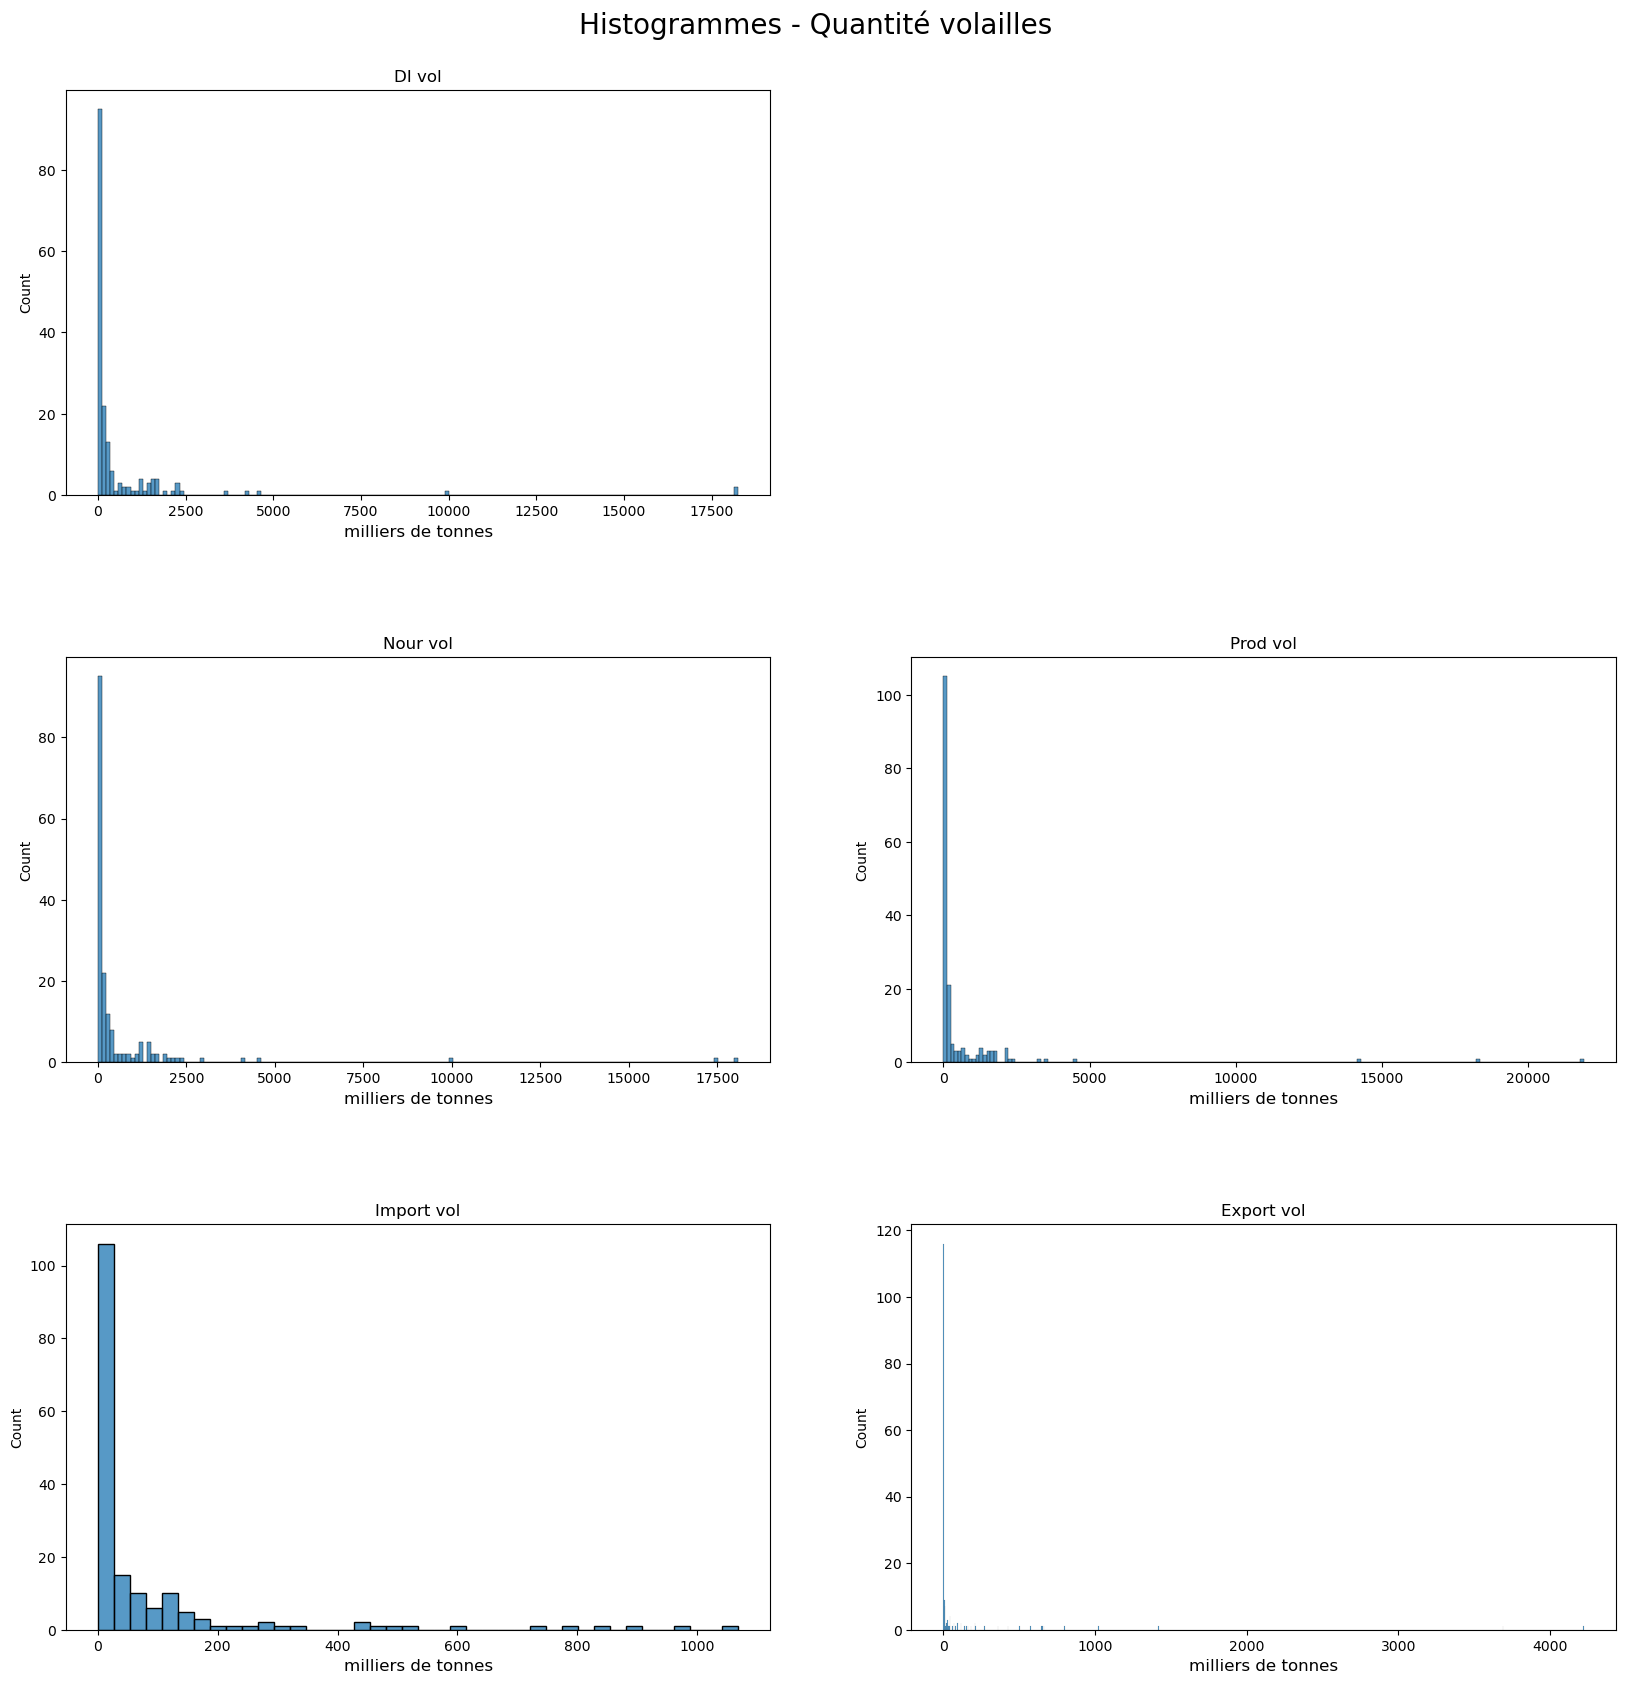

In [78]:
plt.figure(figsize=(20,20))
plt.suptitle('Histogrammes - Quantité volailles',y=0.92,size=20)

plt.subplot(321,title='DI vol')
sns.histplot(data=join1,x='DI vol')
plt.xlabel('milliers de tonnes',fontsize=12)

plt.subplot(323,title='Nour vol')
sns.histplot(data=join1,x='Nour vol')
plt.xlabel('milliers de tonnes',fontsize=12)

plt.subplot(324,title='Prod vol')
sns.histplot(data=join1,x='Prod vol')
plt.xlabel('milliers de tonnes',fontsize=12)

plt.subplot(325,title='Import vol')
sns.histplot(data=join1,x='Import vol')
plt.xlabel('milliers de tonnes',fontsize=12)

plt.subplot(326,title='Export vol')
sns.histplot(data=join1,x='Export vol')
plt.xlabel('milliers de tonnes',fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

Les graphiques n'ont pas les mêmes échelles à cause des valeurs max de chacune, cependant on peut observer beaucoup de similitudes entre ces variables:

- Elles sont positives

- Elles sont décalées vers la gauche et + ou - décroissantes

- Elles ont un nombre important de pays pour lesquels les valeurs sont égales ou proches de 0

- Elles ont des extrêmes hauts très supérieurs aux autres (d'où le zoom très petit), très notable pour 'Export vol' et beaucoup moins pour 'Import vol'

Je vais également regarder les boxplots de ces variables

In [79]:
flierprops = dict(marker='o',markerfacecolor='red',markersize=4)
meanprops = dict(marker='x',markeredgecolor='#EC00FF',markersize=12)

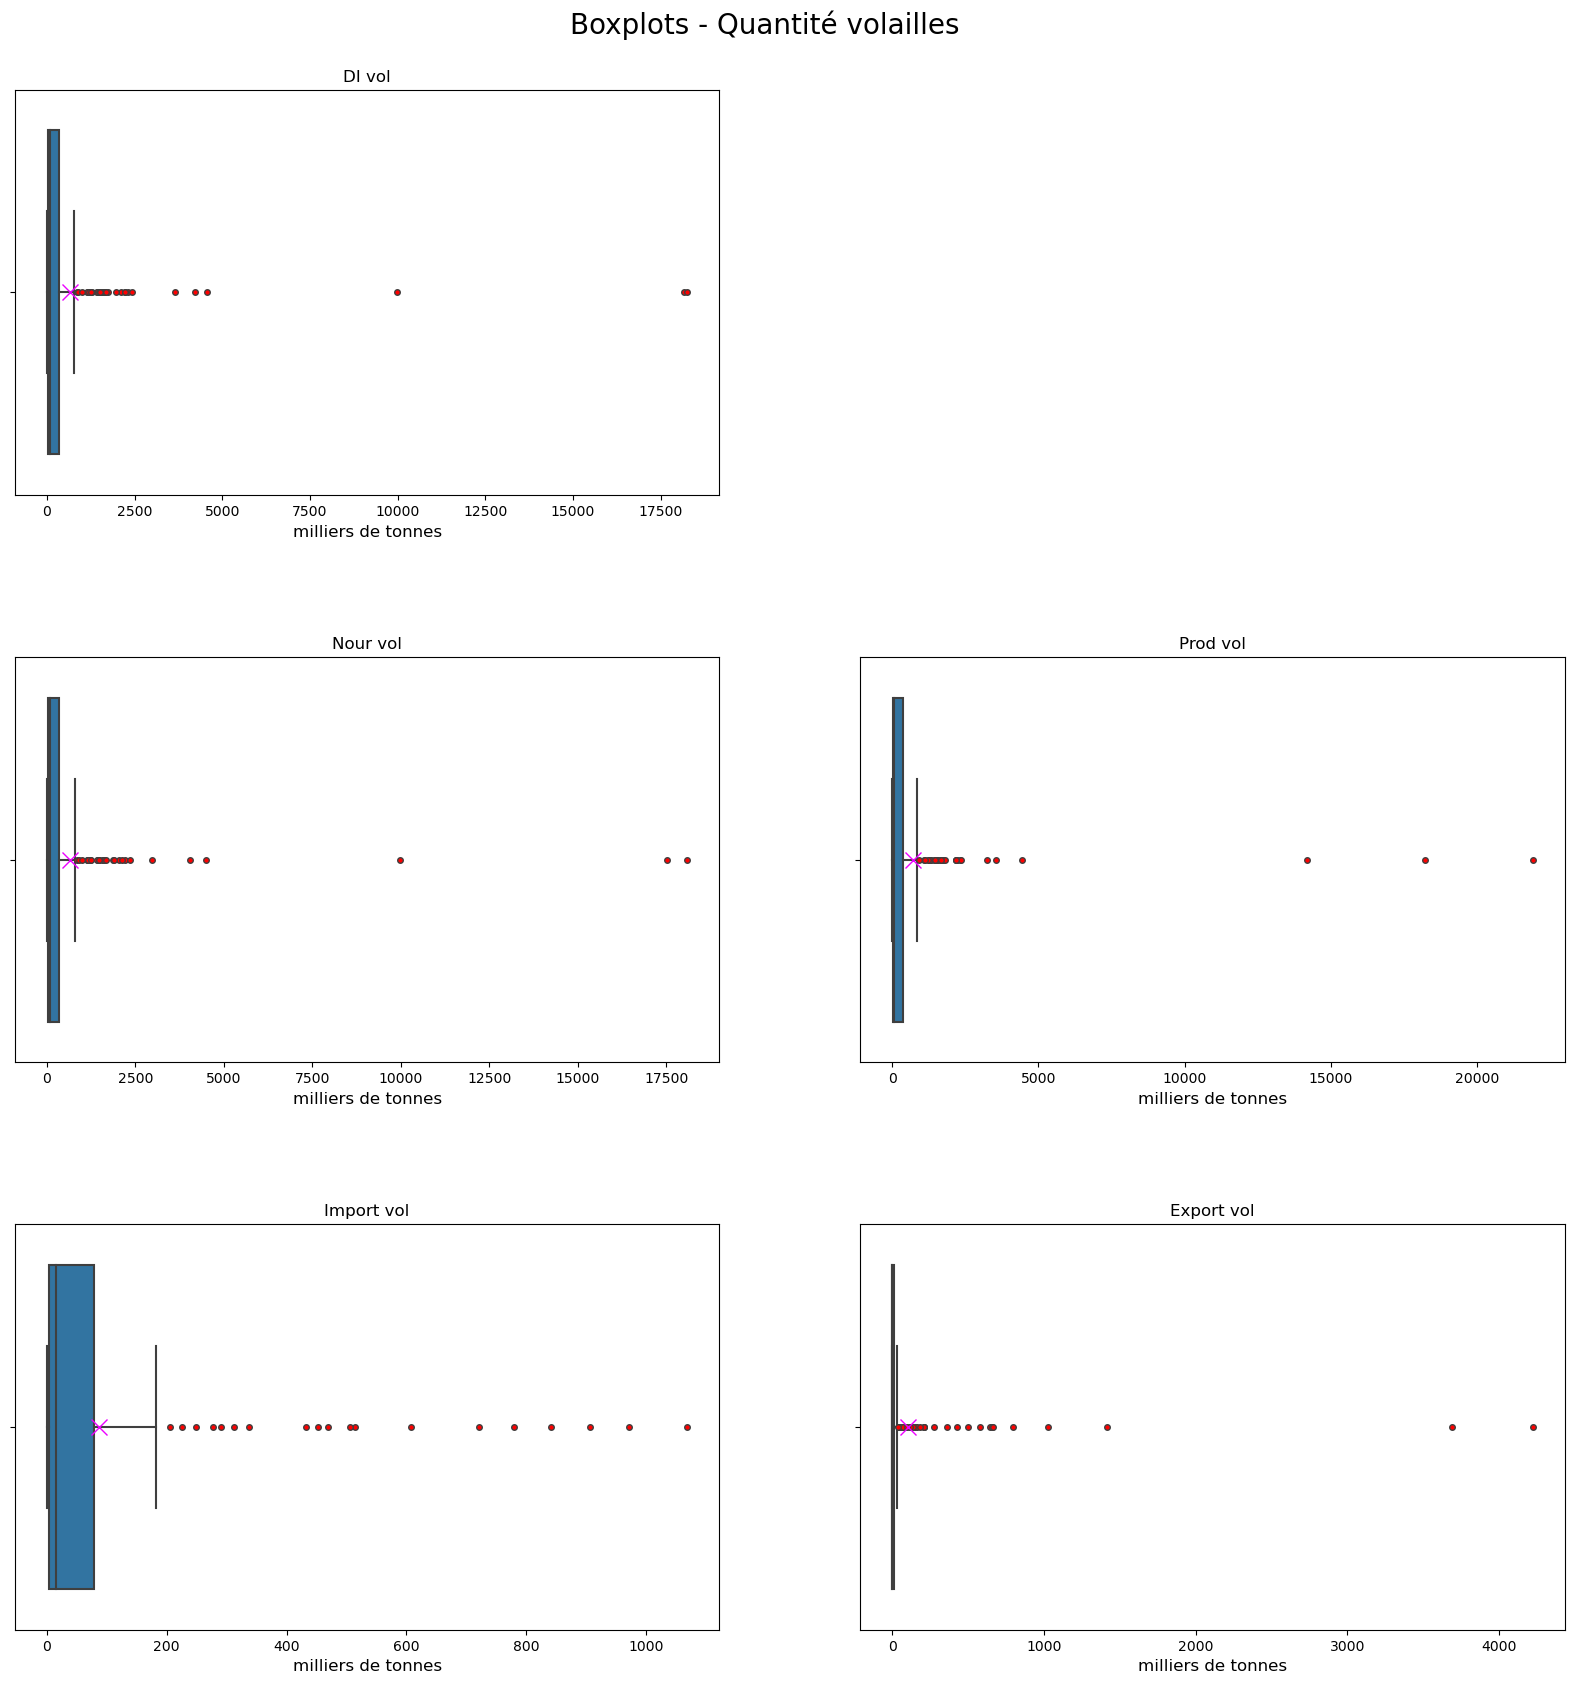

In [80]:
plt.figure(figsize=(20,20))
plt.suptitle('Boxplots - Quantité volailles',y=0.92,size=20)

plt.subplot(321,title='DI vol')
sns.boxplot(data=join1,x='DI vol',showmeans=True,flierprops=flierprops,meanprops=meanprops)
plt.xlabel('milliers de tonnes',fontsize=12)

plt.subplot(323,title='Nour vol')
sns.boxplot(data=join1,x='Nour vol',showmeans=True,flierprops=flierprops,meanprops=meanprops)
plt.xlabel('milliers de tonnes',fontsize=12)

plt.subplot(324,title='Prod vol')
sns.boxplot(data=join1,x='Prod vol',showmeans=True,flierprops=flierprops,meanprops=meanprops)
plt.xlabel('milliers de tonnes',fontsize=12)

plt.subplot(325,title='Import vol')
sns.boxplot(data=join1,x='Import vol',showmeans=True,flierprops=flierprops,meanprops=meanprops)
plt.xlabel('milliers de tonnes',fontsize=12)

plt.subplot(326,title='Export vol')
sns.boxplot(data=join1,x='Export vol',showmeans=True,flierprops=flierprops,meanprops=meanprops)
plt.xlabel('milliers de tonnes',fontsize=12)


plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

Avec ces graphiques, on a une meilleur visualisation des outliers (points rouges), avec notamment 2 ou 3 points qui font cavaliers seuls, sauf pour 'Import vol', d'ailleurs ce dernier présente une boite bien plus large que celles des autres variables 

On peut également observer, sauf pour 'Import vol', que la médiane, le 1er quartile et les êxtemes bas sont quasiment au même niveau. Pour tous, la moyenne (croix rose) est située après le 3ème quartile, voire même au niveau des outliers pour 'Export vol'

Ensuite, je vais à nouveau regarder les boxplots de ces variables, mais cette fois-ci sans les outliers et sur le même graphique pour avoir une échelle unique et comparer leurs valeurs entre elles

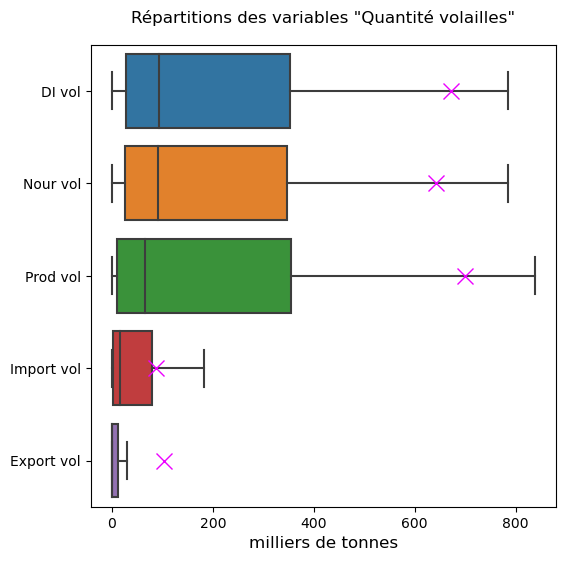

In [81]:
box_var1 = pd.melt(join1,id_vars='Pays')
box_var1.head()

plt.figure(figsize=(6,6))
plt.title('Répartitions des variables "Quantité volailles"',y=1.03)

sns.boxplot(y='variable', x='value', data=box_var1,showfliers = False,showmeans=True,meanprops=meanprops)
plt.ylabel('')
plt.xlabel('milliers de tonnes',fontsize=12)

plt.show()

Ici on retrouve un boxplot pour chacune des 6 variables sans les outliers, ce qui nours permet de visualiser plus clairement la répartition et la dispersion des variables

On peut observer que les variables 'DI vol', 'Nour vol' et 'Prod vol' ont une réparition plus ou moins similaires, avec une médiane légèrement inférieur pour 'Prod vol' mais par contre une moyenne légèrement supérieure

Ensuite avec des valeurs nettement inférieurs, on a la variable 'Import vol', puis encore un cran en dessous la variable 'Export vol', pour laquelle, la plupart des valeurs sont proches de 0. Il y a donc beaucoup plus de pays importateur de volailles que de pays exportateur

Il peut également être intéressant de regarder les tops 10 de ces variables

In [82]:
join1.nlargest(10,'DI vol')

,Pays,DI vol,Nour vol,Prod vol,Import vol,Export vol
171,États-Unis d'Amérique,18266.0,18100.0,21914.0,123.0,3692.0
36,"Chine, continentale",18161.0,17518.0,18236.0,452.0,576.0
23,Brésil,9982.0,9982.0,14201.0,3.0,4223.0
54,Fédération de Russie,4556.0,4509.0,4444.0,226.0,115.0
100,Mexique,4219.0,4058.0,3249.0,972.0,9.0
68,Inde,3661.0,2965.0,3545.0,0.0,4.0
77,Japon,2415.0,2359.0,2215.0,1069.0,10.0
69,Indonésie,2323.0,1904.0,2301.0,1.0,0.0
126,Royaume-Uni de Grande-Bretagne et d'Irlande du...,2234.0,2131.0,1814.0,779.0,359.0
70,Iran (République islamique d'),2220.0,2220.0,2174.0,6.0,45.0


In [83]:
join1.nlargest(10,'Nour vol')

,Pays,DI vol,Nour vol,Prod vol,Import vol,Export vol
171,États-Unis d'Amérique,18266.0,18100.0,21914.0,123.0,3692.0
36,"Chine, continentale",18161.0,17518.0,18236.0,452.0,576.0
23,Brésil,9982.0,9982.0,14201.0,3.0,4223.0
54,Fédération de Russie,4556.0,4509.0,4444.0,226.0,115.0
100,Mexique,4219.0,4058.0,3249.0,972.0,9.0
68,Inde,3661.0,2965.0,3545.0,0.0,4.0
77,Japon,2415.0,2359.0,2215.0,1069.0,10.0
70,Iran (République islamique d'),2220.0,2220.0,2174.0,6.0,45.0
126,Royaume-Uni de Grande-Bretagne et d'Irlande du...,2234.0,2131.0,1814.0,779.0,359.0
1,Afrique du Sud,2118.0,2035.0,1667.0,514.0,63.0


In [84]:
join1.nlargest(10,'Prod vol')

,Pays,DI vol,Nour vol,Prod vol,Import vol,Export vol
171,États-Unis d'Amérique,18266.0,18100.0,21914.0,123.0,3692.0
36,"Chine, continentale",18161.0,17518.0,18236.0,452.0,576.0
23,Brésil,9982.0,9982.0,14201.0,3.0,4223.0
54,Fédération de Russie,4556.0,4509.0,4444.0,226.0,115.0
68,Inde,3661.0,2965.0,3545.0,0.0,4.0
100,Mexique,4219.0,4058.0,3249.0,972.0,9.0
121,Pologne,1156.0,1150.0,2351.0,55.0,1025.0
69,Indonésie,2323.0,1904.0,2301.0,1.0,0.0
77,Japon,2415.0,2359.0,2215.0,1069.0,10.0
159,Turquie,1674.0,1674.0,2192.0,3.0,429.0


On peut observer pour ces 3 premières variables que les pays du top 6 sont toujours les mêmes avec Les États-Unis et la Chine loin devant (presque 2 fois plus que le 3e en DI et Nour), ensuite le Brésil puis la Russie, le Mexique et l'Inde. On retrouve aussi souvent dans le reste du top 10 le Japon, le Royaume-Uni, l'Indonésie, l'Iran...

On peut soupçonner de fortes corrélations entre ces 3 variables

In [85]:
join1.nlargest(10,'Import vol')

,Pays,DI vol,Nour vol,Prod vol,Import vol,Export vol
77,Japon,2415.0,2359.0,2215.0,1069.0,10.0
100,Mexique,4219.0,4058.0,3249.0,972.0,9.0
33,Chine - RAS de Hong-Kong,280.0,391.0,24.0,907.0,663.0
4,Allemagne,1739.0,1609.0,1514.0,842.0,646.0
126,Royaume-Uni de Grande-Bretagne et d'Irlande du...,2234.0,2131.0,1814.0,779.0,359.0
7,Arabie saoudite,1435.0,1435.0,616.0,722.0,10.0
119,Pays-Bas,372.0,346.0,1100.0,608.0,1418.0
1,Afrique du Sud,2118.0,2035.0,1667.0,514.0,63.0
53,France,1573.0,1485.0,1750.0,506.0,501.0
71,Iraq,566.0,561.0,96.0,470.0,0.0


In [86]:
join1.nlargest(10,'Export vol')

,Pays,DI vol,Nour vol,Prod vol,Import vol,Export vol
23,Brésil,9982.0,9982.0,14201.0,3.0,4223.0
171,États-Unis d'Amérique,18266.0,18100.0,21914.0,123.0,3692.0
119,Pays-Bas,372.0,346.0,1100.0,608.0,1418.0
121,Pologne,1156.0,1150.0,2351.0,55.0,1025.0
153,Thaïlande,881.0,896.0,1676.0,2.0,796.0
33,Chine - RAS de Hong-Kong,280.0,391.0,24.0,907.0,663.0
16,Belgique,152.0,144.0,463.0,338.0,656.0
4,Allemagne,1739.0,1609.0,1514.0,842.0,646.0
36,"Chine, continentale",18161.0,17518.0,18236.0,452.0,576.0
53,France,1573.0,1485.0,1750.0,506.0,501.0


Pour l'importation, il n'y a pas un très grand écart entre les pays. A part le Japon, le Mexique et le Royaume-Uni, les gros des 3 variables précédentes ne sont plus là

Pour l'exportation, on retrouve 2 gros pays des 3 variables précédentes dans le top 2 avec le Brésil et les États-Unis loin devant. A noter, on a également Hong-Kong qui produit peu de volailles mais qui en exporte beaucoup de part son importation

### 2) Les variables des taux de disponibilité alimentaire

In [87]:
join2 = join[['Pays','% DI vol','% Nour vol','% Prod vol','% Import vol','% Export vol']]
join2.describe()

,% DI vol,% Nour vol,% Prod vol,% Import vol,% Export vol
count,174.000000,174.000000,174.000000,174.000000,174.000000
mean,1.657971,2.914416,1.394271,2.423380,0.458763
std,1.717442,2.510716,2.205416,3.668371,1.520474
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.537650,1.061414,0.250615,0.213779,0.000000
50%,1.101841,2.129592,0.793764,1.019749,0.000000
75%,2.105365,4.038228,1.615953,3.078898,0.476570
max,9.195402,13.043478,18.373494,24.285714,18.370740


Tout comme le groupe de variables précédent, je vais regarder les histogrammes et les boxplots de ces variables 

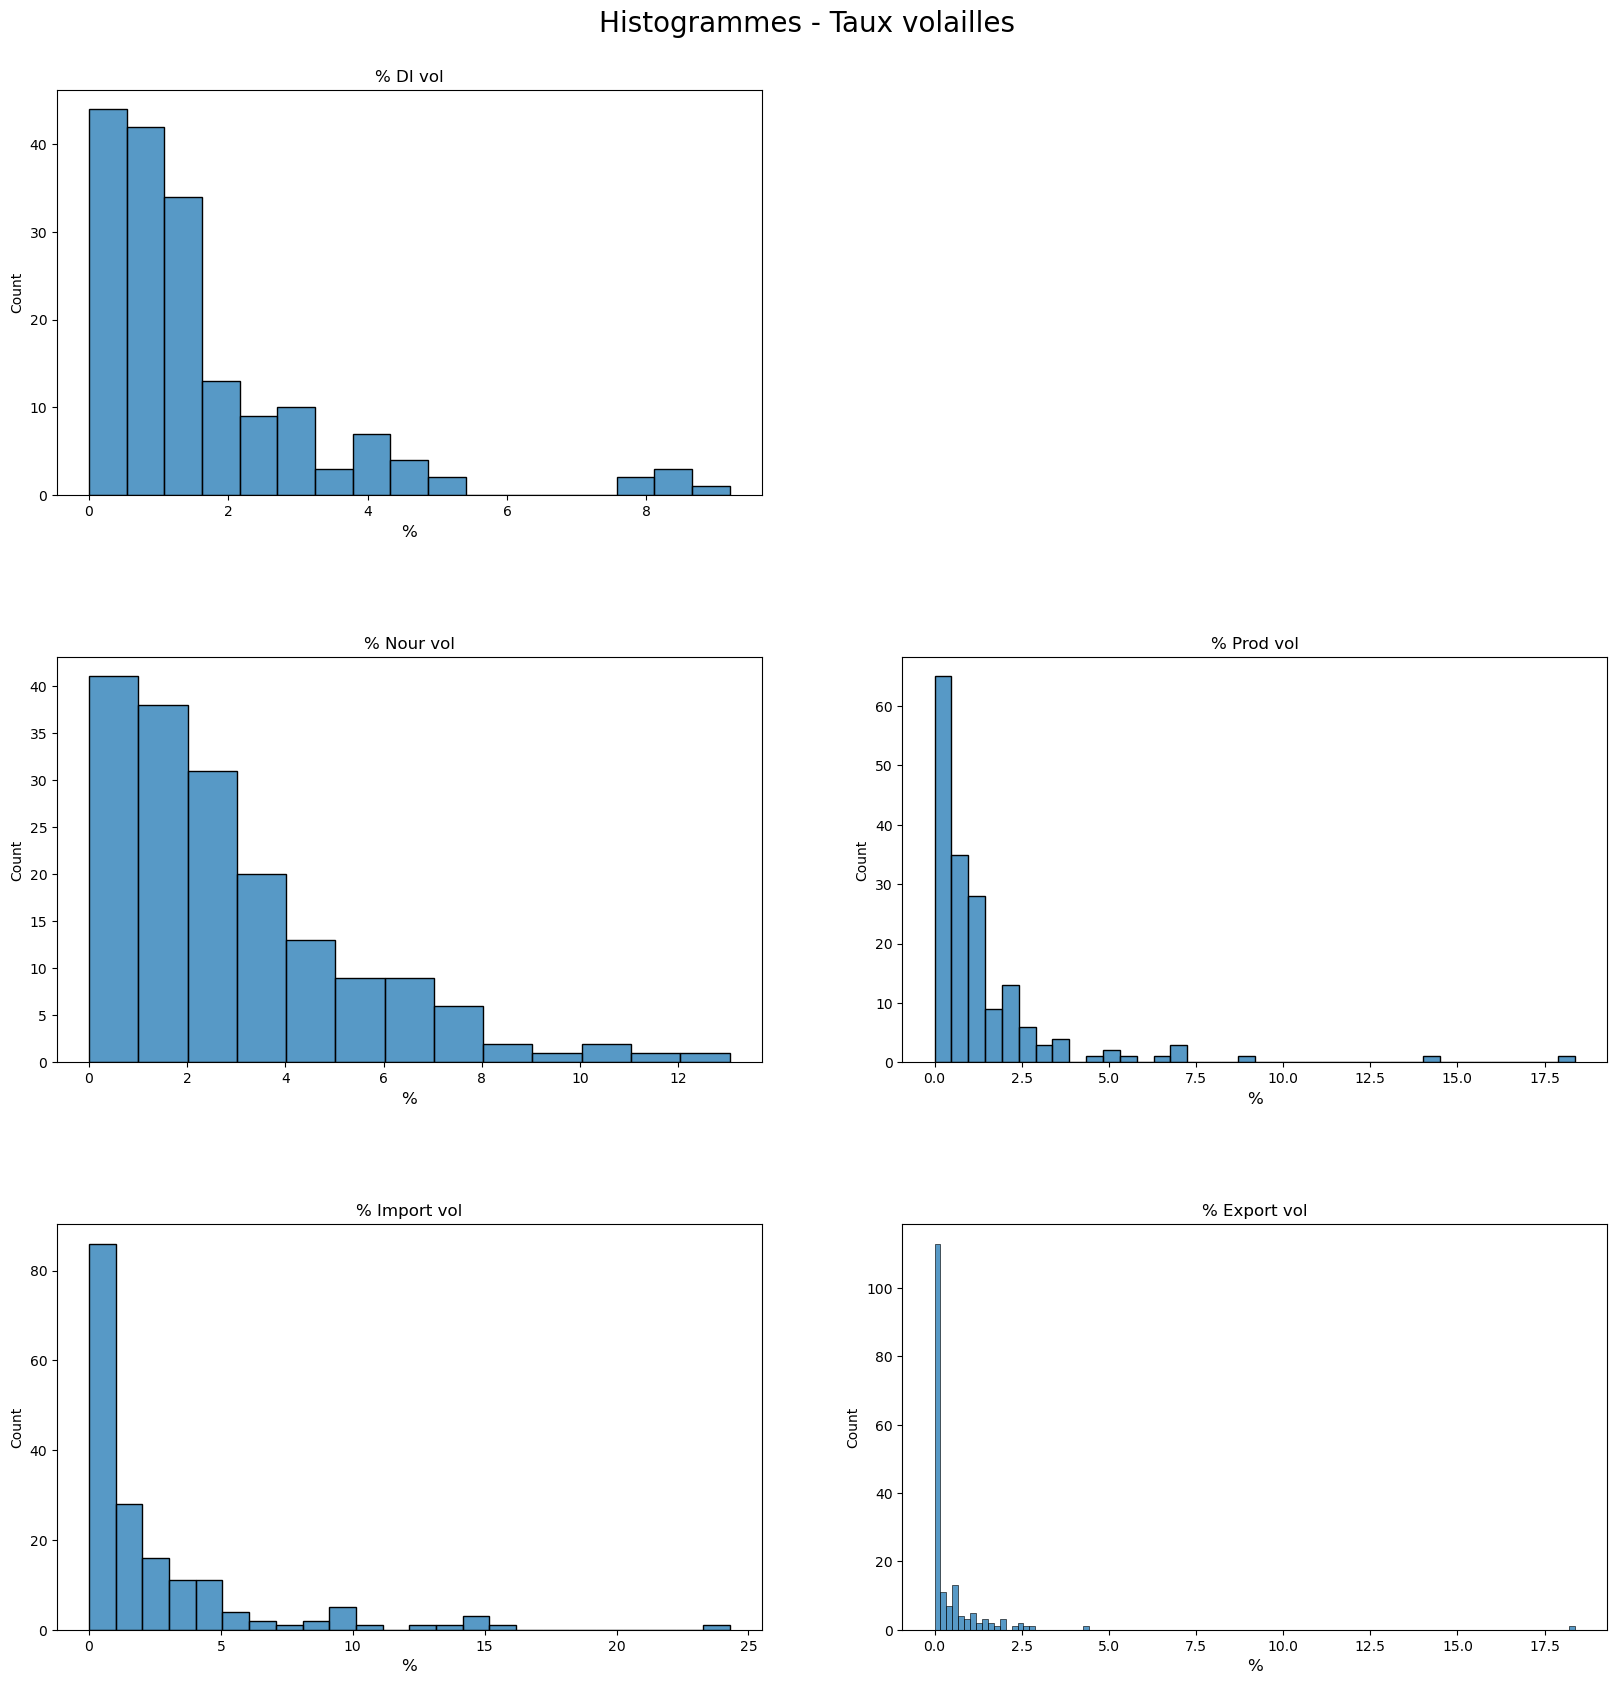

In [88]:
plt.figure(figsize=(20,20))
plt.suptitle('Histogrammes - Taux volailles',y=0.92,size=20)

plt.subplot(321,title='% DI vol')
sns.histplot(data=join2,x='% DI vol')
plt.xlabel('%',fontsize=12)

plt.subplot(323,title='% Nour vol')
sns.histplot(data=join2,x='% Nour vol')
plt.xlabel('%',fontsize=12)

plt.subplot(324,title='% Prod vol')
sns.histplot(data=join2,x='% Prod vol')
plt.xlabel('%',fontsize=12)

plt.subplot(325,title='% Import vol')
sns.histplot(data=join2,x='% Import vol')
plt.xlabel('%',fontsize=12)

plt.subplot(326,title='% Export vol')
sns.histplot(data=join2,x='% Export vol')
plt.xlabel('%',fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

Ici on a affaire à des taux, donc les écarts entre les extrêmes sont logiquement moins importants et les graphiques un peu plus lisibles

Également on a des similitudes entre les variables :

- Elles sont positives

- Elles sont décalées vers la gauche et + ou - décroissantes

A noter quelques extrêmes isolés pour 'Prod vol', 'Import vol' et surtout 'Export vol'

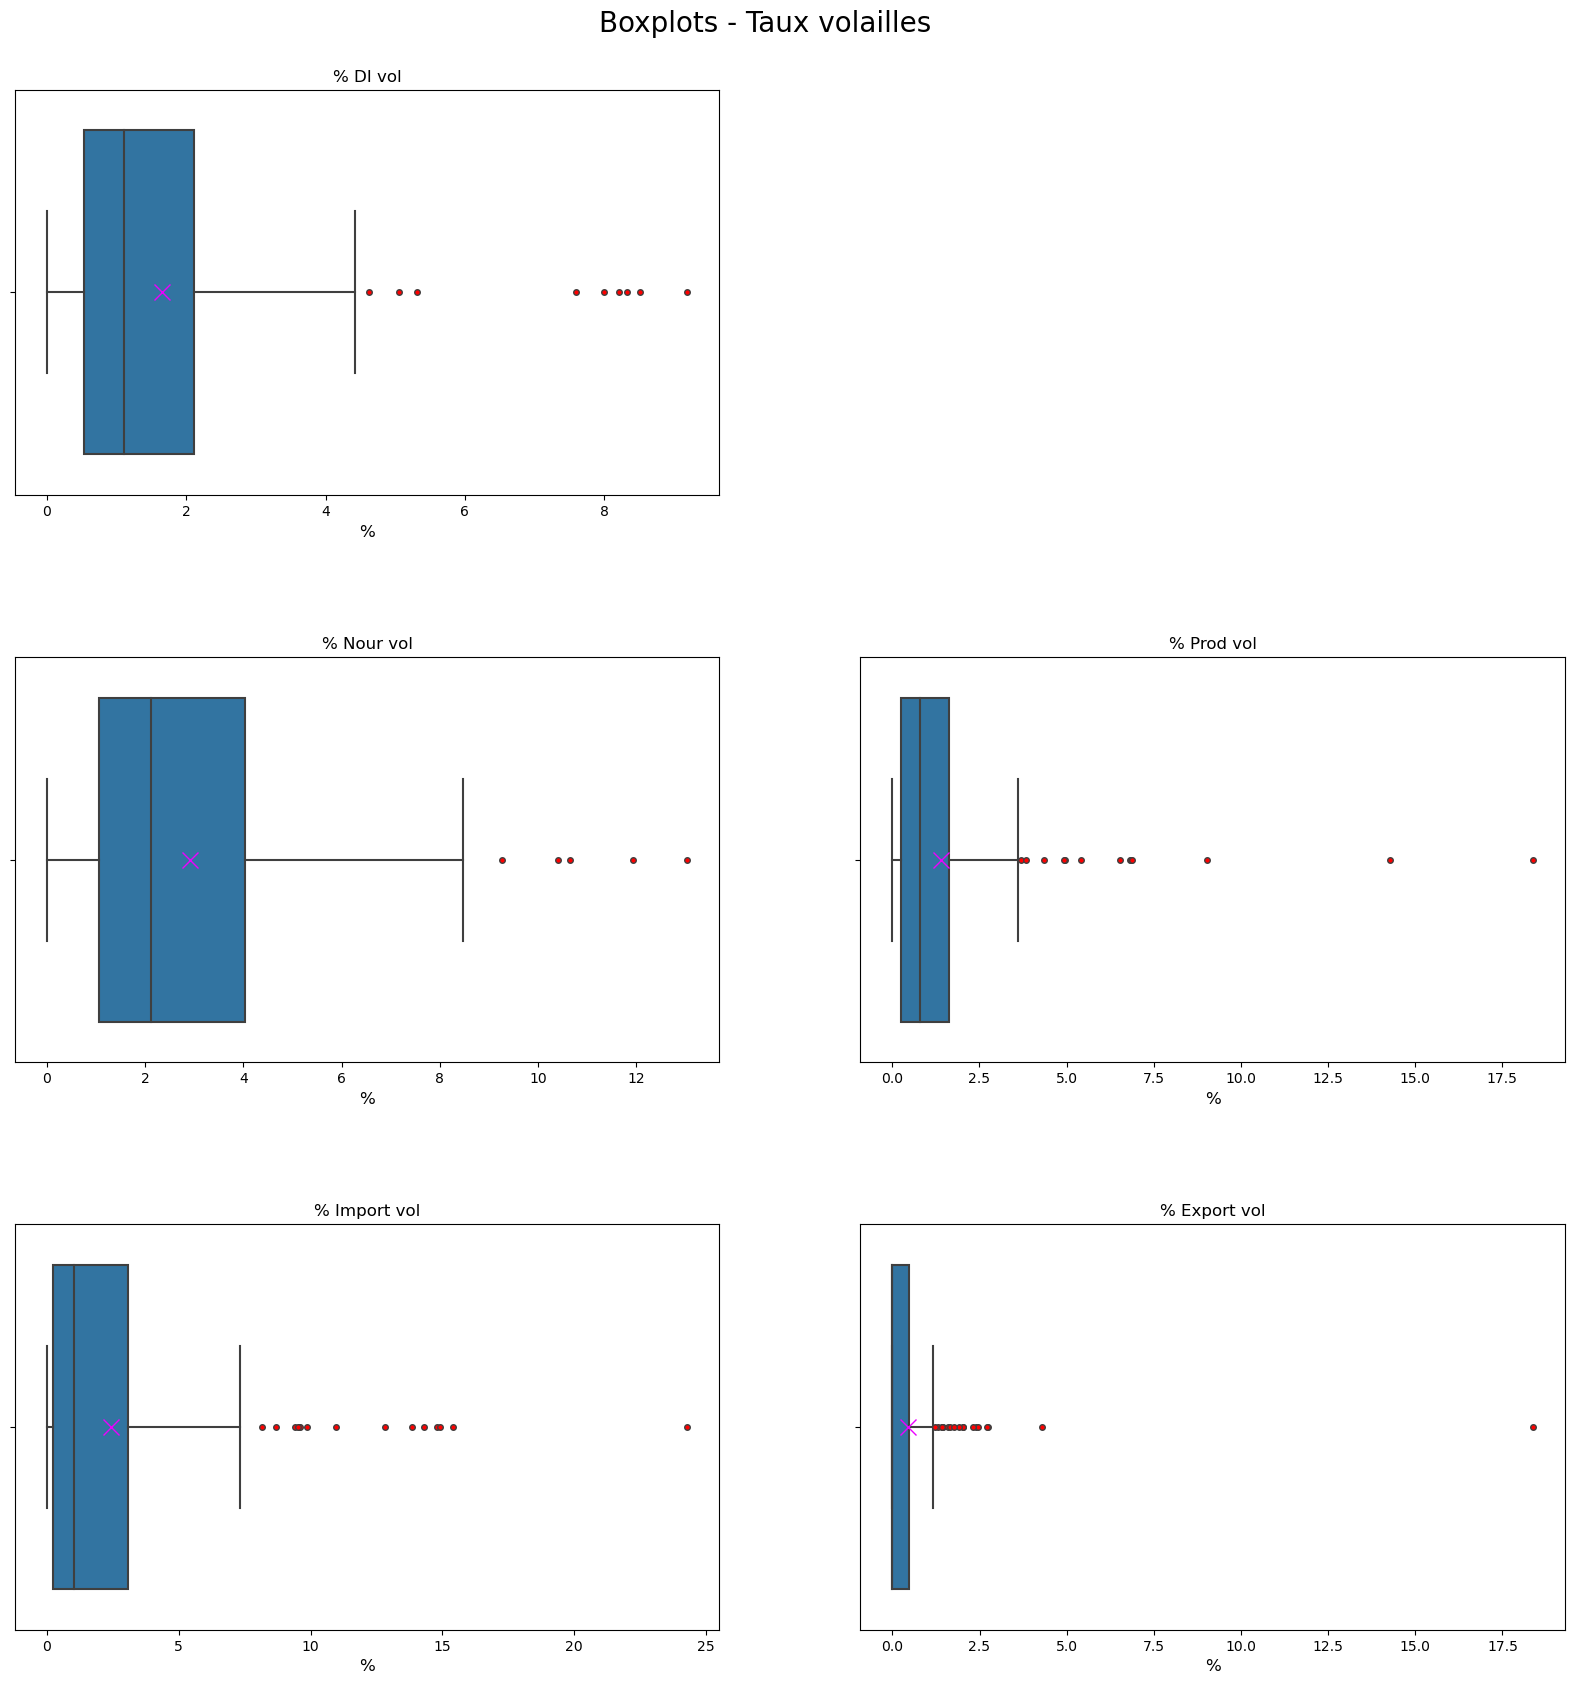

In [89]:
plt.figure(figsize=(20,20))
plt.suptitle('Boxplots - Taux volailles',y=0.92,size=20)

plt.subplot(321,title='% DI vol')
sns.boxplot(data=join2,x='% DI vol',showmeans=True,flierprops=flierprops,meanprops=meanprops)
plt.xlabel('%',fontsize=12)

plt.subplot(323,title='% Nour vol')
sns.boxplot(data=join2,x='% Nour vol',showmeans=True,flierprops=flierprops,meanprops=meanprops)
plt.xlabel('%',fontsize=12)

plt.subplot(324,title='% Prod vol')
sns.boxplot(data=join2,x='% Prod vol',showmeans=True,flierprops=flierprops,meanprops=meanprops)
plt.xlabel('%',fontsize=12)

plt.subplot(325,title='% Import vol')
sns.boxplot(data=join2,x='% Import vol',showmeans=True,flierprops=flierprops,meanprops=meanprops)
plt.xlabel('%',fontsize=12)

plt.subplot(326,title='% Export vol')
sns.boxplot(data=join2,x='% Export vol',showmeans=True,flierprops=flierprops,meanprops=meanprops)
plt.xlabel('%',fontsize=12)


plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

Pour les taux, il y a beaucoup moins d'outliers que les quantité. Les moyennes se situent toutes entre la médiane et le 3ème quartile

Les variables les plus dispersées sont '% Nour vol' et 'Import vol' (attention à bien se fier aux échelles) et de très la loin la variable la plus resserrée est '% Export vol' avec énormément de valeurs comprises entre 0 et 1

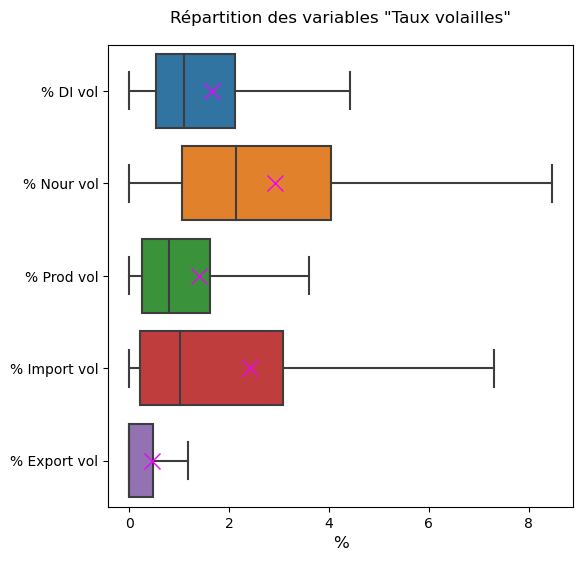

In [90]:
box_var2 = pd.melt(join2,id_vars='Pays')
box_var2.head()

plt.figure(figsize=(6,6))
plt.title('Répartition des variables "Taux volailles"',y=1.03)

sns.boxplot(y='variable', x='value', data=box_var2,showfliers = False,showmeans=True,meanprops=meanprops)
plt.ylabel('')
plt.xlabel('%',fontsize=12)
plt.show()

Toujours pour comparer les variables entre elles, on retrouve des boites larges pour '% Nour vol' et '% Import vol' avec les valeurs les plus élévées, surtout pour '% Nour vol' à tout les niveaux. Enuite on a des boites de taille moyenne pour '% DI vol' et '% Prod vol' avec des valeurs légèrement plus élevés pour '% DI vol'. Puis '% Export vol' avec une boite très fine et des valeurs très faibles

Je vais regarder également les valeurs les plus hautes de ces variables

In [91]:
join2.nlargest(10,'% DI vol')

,Pays,% DI vol,% Nour vol,% Prod vol,% Import vol,% Export vol
58,Grenade,9.195402,9.259259,2.040816,14.893617,0.000000
156,Trinité-et-Tobago,8.510638,10.653409,18.373494,3.142077,0.000000
6,Antigua-et-Barbuda,8.333333,8.474576,0.000000,9.859155,0.000000
137,Sainte-Lucie,8.208955,10.416667,1.470588,9.615385,0.000000
135,Saint-Kitts-et-Nevis,8.000000,13.043478,0.000000,14.285714,0.000000
13,Bahamas,7.602339,7.441860,3.296703,12.834225,0.000000
74,Israël,5.315948,7.651025,9.014044,0.000000,0.235294
83,Koweït,5.049426,6.743185,6.862745,3.832168,0.694444
110,Nouvelle-Calédonie,4.621849,7.006369,1.123596,6.040268,0.000000
7,Arabie saoudite,4.428602,7.934314,6.816421,2.733399,0.446229


In [92]:
join2.nlargest(10,'% Nour vol')

,Pays,% DI vol,% Nour vol,% Prod vol,% Import vol,% Export vol
135,Saint-Kitts-et-Nevis,8.000000,13.043478,0.000000,14.285714,0.000000
136,Saint-Vincent-et-les Grenadines,3.883495,11.940299,0.000000,10.975610,0.000000
156,Trinité-et-Tobago,8.510638,10.653409,18.373494,3.142077,0.000000
137,Sainte-Lucie,8.208955,10.416667,1.470588,9.615385,0.000000
58,Grenade,9.195402,9.259259,2.040816,14.893617,0.000000
6,Antigua-et-Barbuda,8.333333,8.474576,0.000000,9.859155,0.000000
138,Samoa,4.335260,8.176101,0.000000,24.285714,0.000000
7,Arabie saoudite,4.428602,7.934314,6.816421,2.733399,0.446229
74,Israël,5.315948,7.651025,9.014044,0.000000,0.235294
15,Barbade,4.176904,7.602339,6.849315,0.836820,0.000000


In [93]:
join2.nlargest(10,'% Prod vol')

,Pays,% DI vol,% Nour vol,% Prod vol,% Import vol,% Export vol
156,Trinité-et-Tobago,8.510638,10.653409,18.373494,3.142077,0.000000
34,Chine - RAS de Macao,4.269663,4.677060,14.285714,4.703476,0.000000
74,Israël,5.315948,7.651025,9.014044,0.000000,0.235294
83,Koweït,5.049426,6.743185,6.862745,3.832168,0.694444
15,Barbade,4.176904,7.602339,6.849315,0.836820,0.000000
7,Arabie saoudite,4.428602,7.934314,6.816421,2.733399,0.446229
78,Jordanie,3.862360,5.729167,6.531882,1.409071,1.121076
33,Chine - RAS de Hong-Kong,4.412924,6.894728,5.405405,9.401887,18.370740
35,"Chine, Taiwan Province de",3.094816,5.177417,4.950645,1.115808,0.479329
165,Yémen,2.755994,2.816399,4.922356,1.272223,0.000000


In [94]:
join2.nlargest(10,'% Import vol')

,Pays,% DI vol,% Nour vol,% Prod vol,% Import vol,% Export vol
138,Samoa,4.335260,8.176101,0.000000,24.285714,0.0
46,Dominique,2.684564,4.347826,0.000000,15.384615,0.0
58,Grenade,9.195402,9.259259,2.040816,14.893617,0.0
55,Gabon,3.485255,4.320113,0.236967,14.785992,0.0
135,Saint-Kitts-et-Nevis,8.000000,13.043478,0.000000,14.285714,0.0
39,Congo,2.582766,3.516624,0.200343,13.829787,0.0
13,Bahamas,7.602339,7.441860,3.296703,12.834225,0.0
136,Saint-Vincent-et-les Grenadines,3.883495,11.940299,0.000000,10.975610,0.0
6,Antigua-et-Barbuda,8.333333,8.474576,0.000000,9.859155,0.0
137,Sainte-Lucie,8.208955,10.416667,1.470588,9.615385,0.0


In [95]:
join2.nlargest(10,'% Export vol')

,Pays,% DI vol,% Nour vol,% Prod vol,% Import vol,% Export vol
33,Chine - RAS de Hong-Kong,4.412924,6.894728,5.405405,9.401887,18.370740
121,Pologne,1.342937,3.313453,2.369052,0.389160,4.304372
23,Brésil,0.919126,6.233568,1.167674,0.016988,2.744935
147,Suriname,3.822630,5.521472,1.426534,9.523810,2.717391
126,Royaume-Uni de Grande-Bretagne et d'Irlande du...,2.361597,3.531244,2.446854,2.049137,2.449509
119,Pays-Bas,0.738550,2.150003,2.256827,1.014991,2.408411
159,Turquie,1.133709,2.197369,1.443663,0.017886,2.318794
26,Bélarus,0.913573,2.873313,1.376583,0.544323,2.026667
16,Belgique,0.471742,1.241058,1.668048,0.868895,2.023567
169,Émirats arabes unis,3.493006,6.915072,2.677078,2.889363,1.912902


Pour '% DI vol', '% Nour vol' et '% Import vol' on retrouve parmi les pays une majorité de 'petites iles', au contraire de '% Export vol' avec des plus 'gros pays' avec le cas particulier de Hong-Kong en tête avec un taux d'exportations de volailles égal à 18.4% de leurs exportations de produits alimentaires (le 2ème étant à 4.3% et le 3ème à 2.7%)

### <font color='green'> 3) Les autres variables 

In [96]:
join3 = join[['Pays','Population','Ind qte import','Ind val unit import','Inflation','Stabi poli','PIB hab','Distance','Perf logist']]
join3.describe()

,Population,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist
count,1.740000e+02,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,4.235212e+04,162.298851,98.333333,13.047920,-0.048621,20612.897701,6082.766208,2.871851
std,1.522445e+05,459.490104,19.900136,117.403700,0.897252,21142.008589,3925.642043,0.512100
min,5.204500e+01,8.000000,34.000000,-6.010453,-2.940000,912.800000,0.000000,1.913048
25%,2.513328e+03,91.000000,90.000000,1.175847,-0.617500,4940.425000,3015.079493,2.534479
50%,9.608513e+03,106.500000,96.000000,2.717903,0.030000,13509.500000,5605.770616,2.750901
75%,2.971320e+04,129.000000,105.000000,5.729164,0.650000,29294.225000,8799.497226,3.082895
max,1.421022e+06,5062.000000,192.000000,1550.632911,1.600000,126144.000000,18540.082537,4.212983


Pour ce dernier groupe de variables, on a affaire à des variables différentes les unes des autres, donc je vais regarder leur histogramme, leur boxplot et leur top 10 séparément

### Population

In [97]:
join3['Population'].describe()

count    1.740000e+02
mean     4.235212e+04
std      1.522445e+05
min      5.204500e+01
25%      2.513328e+03
50%      9.608513e+03
75%      2.971320e+04
max      1.421022e+06
Name: Population, dtype: float64

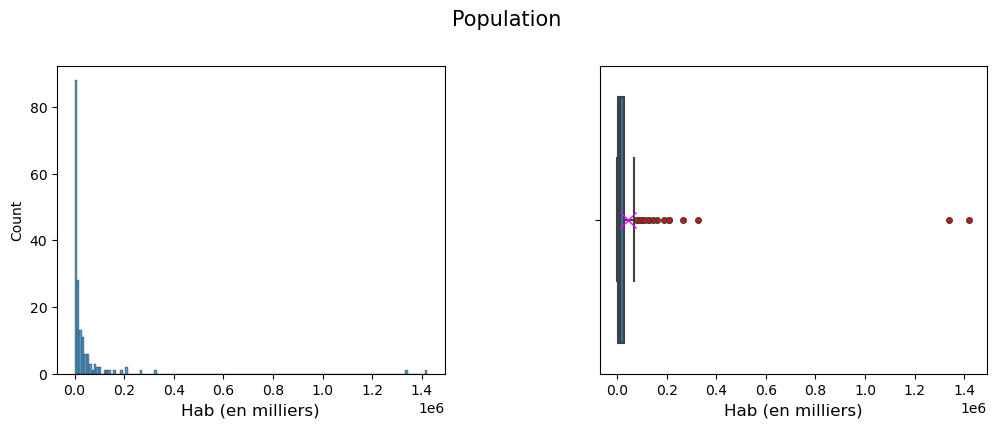

In [98]:
plt.figure(figsize=(12,4))
plt.suptitle('Population',y=1.02,size=15)

plt.subplot(121)
sns.histplot(data=join3,x='Population')
plt.xlabel('Hab (en milliers)',size=12)

plt.subplot(122)
sns.boxplot(data=join3,x='Population',showmeans=True,flierprops=flierprops,meanprops=meanprops)
plt.xlabel('Hab (en milliers)',size=12)

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

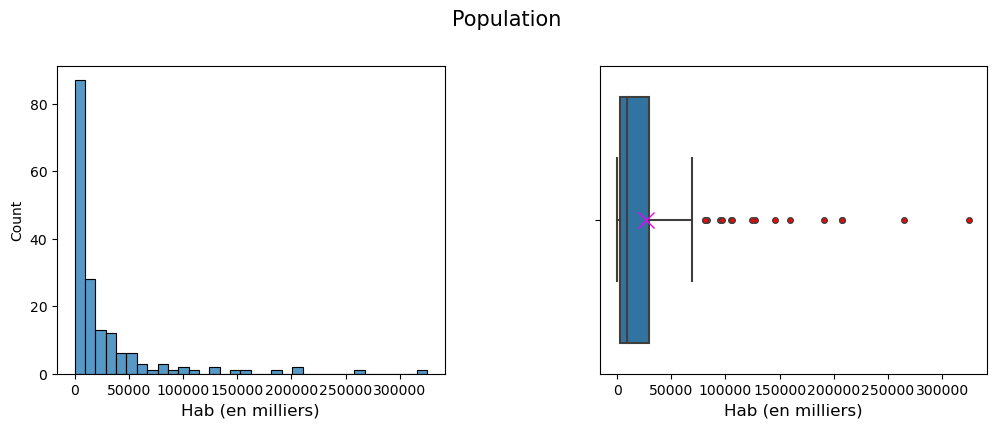

In [99]:
plt.figure(figsize=(12,4))
plt.suptitle('Population',y=1.02,size=15)

plt.subplot(121)
sns.histplot(data=join3.drop([36,68]),x='Population')
plt.xlabel('Hab (en milliers)',size=12)

plt.subplot(122)
sns.boxplot(data=join3.drop([36,68]),x='Population',showmeans=True,flierprops=flierprops,meanprops=meanprops)
plt.xlabel('Hab (en milliers)',size=12)

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

Cette variables est la plus connue et on est pas surpis d'observer 2 outliers très loin des autres avec plus de 1 Md d'habitants pour l'Inde et la Chine. Pour plus de lisibilté, je préfère regarder ces graphiques sans ces 2 outliers

On a encore une répartition décalée vers la gauche et décroissante avec énormément de valeurs proche de 0 et qui se remarque également avec la boite à droite très fine avec donc tout simple 75% des pays ayant une population comprise entre 52k et 30M (la moyenne étant après, fortement réhaussée par ces 2 outliers)

In [100]:
join3.sort_values('Population',ascending=False).head(10)

,Pays,Population,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist
36,"Chine, continentale",1421021.791,92.0,108.0,0.268050,-0.33,14520.8,9283.668375,3.635552
68,Inde,1338676.785,253.0,91.0,4.583020,-0.76,6182.9,7018.087215,3.300022
171,États-Unis d'Amérique,325084.756,91.0,98.0,1.049947,0.29,59914.8,5852.736948,3.941086
69,Indonésie,264650.963,26.0,109.0,2.946788,-0.50,10935.6,11587.344997,3.067268
116,Pakistan,207906.209,151.0,69.0,5.100470,-2.41,5091.1,6138.327507,2.671609
23,Brésil,207833.823,101.0,89.0,-1.486638,-0.47,14524.6,9377.800449,3.038992
108,Nigéria,190873.244,3549.0,80.0,18.878006,-2.00,5190.4,4700.791412,2.579045
14,Bangladesh,159685.424,277.0,72.0,7.619312,-1.26,4894.6,7924.215032,2.621951
54,Fédération de Russie,145530.082,73.0,103.0,0.325522,-0.64,25926.4,2493.922256,2.665432
77,Japon,127502.725,110.0,96.0,3.754016,1.11,41444.2,9736.095008,4.000232


On peut noter la présence de pays qu'on avait pu observer dans les tops de 'DI vol', 'Nour vol' et 'Prod vol' (tous sauf Pakistant, Nigéria et Bangladesh)

In [101]:
join3.sort_values('Population').head(20)

,Pays,Population,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist
135,Saint-Kitts-et-Nevis,52.045,109.0,100.0,3.651453,0.65,26980.3,6760.803027,2.750901
18,Bermudes,63.049,106.5,96.0,2.514507,1.00,81835.0,5757.850396,2.750901
46,Dominique,71.458,99.0,91.0,1.146313,1.20,11341.3,6825.451890,2.750901
6,Antigua-et-Barbuda,95.426,120.0,106.0,2.148107,0.75,19840.3,6711.070955,2.750901
136,Saint-Vincent-et-les Grenadines,109.827,105.0,99.0,3.479037,0.89,13102.1,6989.955338,2.750901
58,Grenade,110.874,107.0,95.0,1.334247,1.01,16217.5,7119.029944,2.750901
82,Kiribati,114.158,115.0,86.0,4.284220,0.88,2069.1,14371.435420,2.750901
137,Sainte-Lucie,180.954,122.0,99.0,1.608983,0.99,14928.4,6905.087770,2.750901
138,Samoa,195.352,102.0,100.0,3.901249,1.18,6486.1,16083.468551,2.750901
139,Sao Tomé-et-Principe,207.089,92.0,72.0,8.961239,0.19,3952.9,5392.539592,2.487817


Dans les pays les moins peuplés, toutes des iles (ou presque) avec 20 pays sous les 500k habitants

### Indice qte import

In [102]:
join3['Ind qte import'].describe()

count     174.000000
mean      162.298851
std       459.490104
min         8.000000
25%        91.000000
50%       106.500000
75%       129.000000
max      5062.000000
Name: Ind qte import, dtype: float64

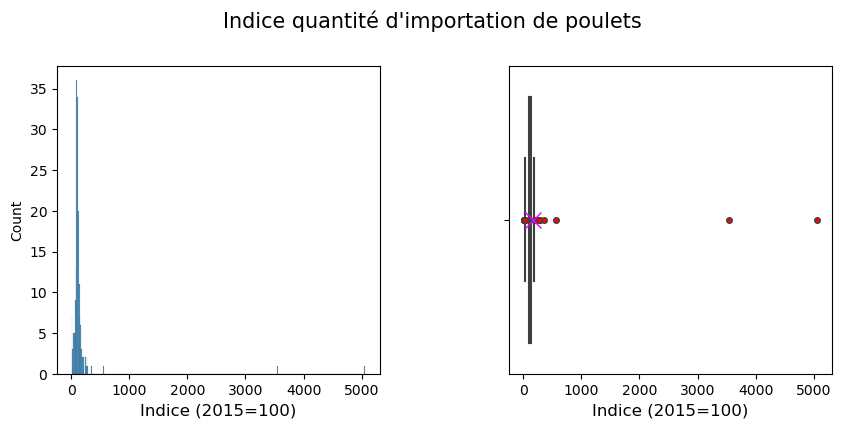

In [103]:
plt.figure(figsize=(10,4))
plt.suptitle("Indice quantité d'importation de poulets",y=1.02,size=15)

plt.subplot(121)
sns.histplot(data=join3,x='Ind qte import')
plt.xlabel('Indice (2015=100)',fontsize=12)

plt.subplot(122)
sns.boxplot(data=join3,x='Ind qte import',showmeans=True,flierprops=flierprops,meanprops=meanprops)
plt.xlabel('Indice (2015=100)',fontsize=12)

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

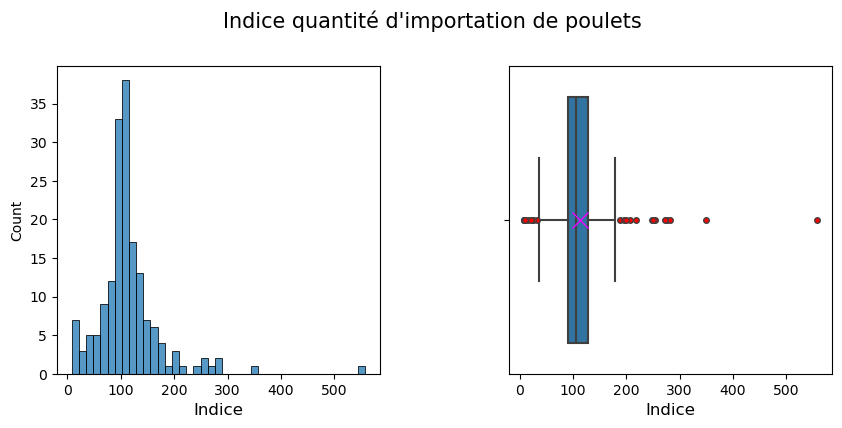

In [104]:
plt.figure(figsize=(10,4))
plt.suptitle("Indice quantité d'importation de poulets",y=1.02,size=15)

plt.subplot(121)
sns.histplot(data=join3.drop([108,111]),x='Ind qte import')
plt.xlabel('Indice',fontsize=12)

plt.subplot(122)
sns.boxplot(data=join3.drop([108,111]),x='Ind qte import',showmeans=True,flierprops=flierprops,meanprops=meanprops)
plt.xlabel('Indice',fontsize=12)

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

Cette variable est exprimée en indice avec en valeur de base 100 par rapport à l'année 2015, comme on avait pu voir il y avait 2 outliers très surprenant que j'ai enlevé pour le 2ème couple de graphiques

On a une pointe au niveau de 100 et on a une tendance décroissante plus on s'éloigne de 100, ici on a distrubtion qui s'apparente à une distribution suivant une loi uniforme

On a une majorité de valeur comprises dans un interval resseré (90-130) avec une moyenne (hors les 2 outliers) compris dedans 

In [105]:
join3.nlargest(10,'Ind qte import')

,Pays,Population,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist
111,Nouvelle-Zélande,4702.034,5062.0,128.0,0.280373,1.60,42218.5,18540.082537,3.634000
108,Nigéria,190873.244,3549.0,80.0,18.878006,-2.00,5190.4,4700.791412,2.579045
159,Turquie,81116.450,558.0,34.0,8.757747,-1.79,27913.8,2258.537538,3.286847
149,Sénégal,15419.355,349.0,112.0,2.793835,-0.05,3203.9,4198.491691,2.288855
104,Myanmar,53382.523,282.0,71.0,4.629630,-1.08,4224.5,8892.671881,2.379285
14,Bangladesh,159685.424,277.0,72.0,7.619312,-1.26,4894.6,7924.215032,2.621951
172,Éthiopie,106399.924,272.0,53.0,15.644909,-1.68,2021.6,5566.295819,2.750901
68,Inde,1338676.785,253.0,91.0,4.583020,-0.76,6182.9,7018.087215,3.300022
161,Uruguay,3436.641,251.0,122.0,6.790123,1.05,23009.9,10936.072797,2.832273
25,Burkina Faso,19193.234,248.0,76.0,5.329874,-0.93,2044.4,4061.676161,2.675405


In [106]:
join3.nsmallest(10,'Ind qte import')

,Pays,Population,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist
80,Kenya,50221.142,8.0,162.0,4.705970,-1.13,4203.6,6468.625815,3.070647
153,Thaïlande,69209.810,9.0,138.0,0.088662,-0.75,17423.0,9454.494024,3.332550
156,Trinité-et-Tobago,1384.059,9.0,123.0,2.577777,0.28,27277.9,7218.511269,2.409209
17,Belize,375.769,10.0,78.0,-0.188414,0.04,7140.9,8602.730299,2.750901
163,Venezuela (République bolivarienne du),29402.484,11.0,104.0,1550.632911,-1.27,4717.0,7619.687246,2.310390
63,Guyana,775.222,16.0,129.0,2.717903,-0.04,12005.4,7308.347596,2.513509
170,Équateur,16785.361,21.0,79.0,-0.646254,-0.07,11617.9,9626.173816,2.829541
69,Indonésie,264650.963,26.0,109.0,2.946788,-0.50,10935.6,11587.344997,3.067268
157,Tunisie,11433.443,26.0,120.0,7.544257,-1.02,11234.5,1479.887274,2.533344
150,Tadjikistan,8880.268,33.0,95.0,7.201001,-0.67,3252.9,5300.768490,2.201372


On avait déjà vu le haut du classement avec les 2 gros outliers, tout de même on peut voir que les autres valeurs complétant ce top sont assez élevées

En ce qui concerne le bas du classemnt, il y a des valeurs très faibles avec des pays qui ont vu leur quantité d'importation de poulets divisé par plus de 10 par rapport à 2015. Clairement ces pays ne seront pas ceux que nous devrons cibler

### Ind val unit import

In [107]:
join3['Ind val unit import'].describe()

count    174.000000
mean      98.333333
std       19.900136
min       34.000000
25%       90.000000
50%       96.000000
75%      105.000000
max      192.000000
Name: Ind val unit import, dtype: float64

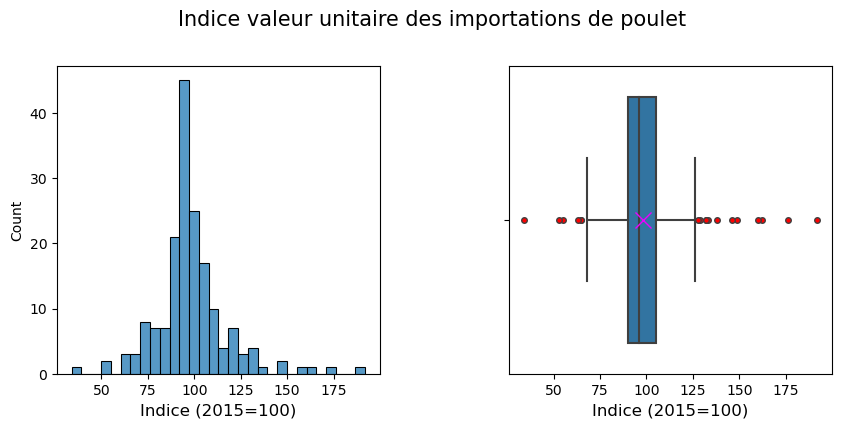

In [108]:
plt.figure(figsize=(10,4))
plt.suptitle('Indice valeur unitaire des importations de poulet',y=1.02,size=15)

plt.subplot(121)
sns.histplot(data=join3,x='Ind val unit import')
plt.xlabel('Indice (2015=100)',fontsize=12)

plt.subplot(122)
sns.boxplot(data=join3,x='Ind val unit import',showmeans=True,flierprops=flierprops,meanprops=meanprops)
plt.xlabel('Indice (2015=100)',fontsize=12)

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

On a également affaire à un indice par rapport à 2015, cette fois-ci pas d'outliers aberrants

Tout comme la variable précédente on a un pic au niveau de 100 puis une décroissante des 2 cotés, on a également un distrubtion s'apparentant à une loi uniforme qui pour ce cas ici est encore plus notable de part ses outliers moins extrêmes

La majorité des valeurs sont très resserées entre 90 et 105 avec une moyenne de 98

In [109]:
join3.nlargest(10,'Ind val unit import')

,Pays,Population,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist
61,Guinée,12067.519,175.0,192.0,14.629215,-0.70,2417.8,4608.603754,2.279480
97,Maroc,35581.255,44.0,176.0,1.733649,-0.37,7312.1,1886.059916,2.602997
80,Kenya,50221.142,8.0,162.0,4.705970,-1.13,4203.6,6468.625815,3.070647
107,Niger,21602.382,37.0,160.0,8.254497,-1.27,1163.2,3918.848930,2.315975
84,Lesotho,2091.534,59.0,149.0,7.228800,-0.19,2668.3,9011.896798,2.152991
134,République-Unie de Tanzanie,54660.339,138.0,146.0,6.284682,-0.56,2530.6,7138.574822,2.750901
153,Thaïlande,69209.810,9.0,138.0,0.088662,-0.75,17423.0,9454.494024,3.332550
127,Rwanda,11980.961,101.0,133.0,-5.279006,0.09,1975.2,6230.855375,2.978115
114,Ouganda,41166.588,87.0,132.0,2.641971,-0.57,2074.7,6108.916305,2.811642
145,Sri Lanka,21128.032,68.0,132.0,8.985985,-0.07,12584.1,8517.073454,2.750901


In [110]:
join3.nsmallest(10,'Ind val unit import')

,Pays,Population,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist
159,Turquie,81116.450,558.0,34.0,8.757747,-1.79,27913.8,2258.537538,3.286847
172,Éthiopie,106399.924,272.0,53.0,15.644909,-1.68,2021.6,5566.295819,2.750901
3,Algérie,41389.189,129.0,55.0,1.815703,-0.92,11737.4,1345.460397,2.609841
160,Ukraine,44487.709,173.0,63.0,17.829880,-1.87,11860.6,2029.964144,2.783342
13,Bahamas,381.755,159.0,65.0,2.636408,0.99,35911.7,7219.128524,2.639969
133,République populaire démocratique de Corée,25429.825,99.0,65.0,2.717903,-0.50,1235.0,8765.000000,2.750901
22,Brunéi Darussalam,424.473,188.0,68.0,2.818880,1.16,60994.5,11202.000000,2.750901
26,Bélarus,9450.231,79.0,69.0,3.632637,-0.05,18356.1,1832.066997,2.484616
116,Pakistan,207906.209,151.0,69.0,5.100470,-2.41,5091.1,6138.327507,2.671609
27,Bénin,11175.198,67.0,71.0,-1.055822,0.03,3044.5,4709.456098,2.589062


Il y a beaucoup de pays africains dans le top haut, mise à part il n'y a pas forcément d'informations importantes à déceler de ces tops

### Inflation

Tout comme pour 'Ind qte import', on avait repérer un oultier vraiment anormal pour le Vénézuela que l'on va directement enlever

In [111]:
join3['Inflation'].loc[join3['Pays']!='Venezuela (République bolivarienne du)'].describe()

count    173.000000
mean       4.160146
std        6.257314
min       -6.010453
25%        1.146313
50%        2.717903
75%        5.697814
max       56.211376
Name: Inflation, dtype: float64

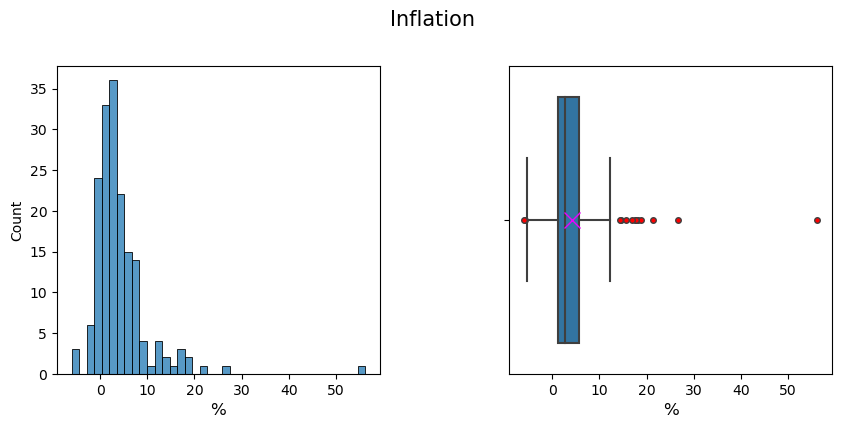

In [112]:
plt.figure(figsize=(10,4))
plt.suptitle('Inflation',y=1.02,size=15)

plt.subplot(121)
sns.histplot(data=join3.loc[join3['Pays']!='Venezuela (République bolivarienne du)'],x='Inflation')
plt.xlabel('%',fontsize=12)

plt.subplot(122)
sns.boxplot(data=join3.loc[join3['Pays']!='Venezuela (République bolivarienne du)'],x='Inflation',showmeans=True,flierprops=flierprops,meanprops=meanprops)
plt.xlabel('%',fontsize=12)

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

Ici on a une forte répartition entre -2 et 8 % (majorité entre 1 et 6 %)

Le taux d'inflation sur les produits alimentaires aura forcément une importance sur le choix final de pays et donc qu'il est clair qu'un taux trop élevé sera éliminatoire

In [113]:
join3.nlargest(10,'Inflation')

,Pays,Population,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist
163,Venezuela (République bolivarienne du),29402.484,11.0,104.0,1550.632911,-1.27,4717.0,7619.687246,2.310390
144,Soudan,40813.397,39.0,101.0,56.211376,-1.98,4598.9,4601.584868,2.480204
115,Ouzbékistan,31959.785,41.0,111.0,26.703499,-0.24,6840.7,5161.588379,2.492262
8,Argentine,43937.140,88.0,75.0,21.295448,0.17,23597.1,11025.347994,2.926315
108,Nigéria,190873.244,3549.0,80.0,18.878006,-2.00,5190.4,4700.791412,2.579045
5,Angola,29816.766,100.0,96.0,18.103539,-0.38,7310.9,6478.953877,2.145592
160,Ukraine,44487.709,173.0,63.0,17.829880,-1.87,11860.6,2029.964144,2.783342
141,Sierra Leone,7488.423,96.0,105.0,17.495292,-0.04,1633.7,4706.993623,2.052701
168,Égypte,96442.591,96.0,97.0,16.851688,-1.42,11014.5,3211.894954,3.002482
172,Éthiopie,106399.924,272.0,53.0,15.644909,-1.68,2021.6,5566.295819,2.750901


In [114]:
join3.nsmallest(10,'Inflation')

,Pays,Population,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist
51,Fidji,877.459,207.0,101.0,-6.010453,0.62,13429.3,16579.284152,2.333093
37,Chypre,1179.678,105.0,94.0,-5.774304,0.54,38288.0,2954.972339,3.074530
127,Rwanda,11980.961,101.0,133.0,-5.279006,0.09,1975.2,6230.855375,2.978115
72,Irlande,4753.279,87.0,101.0,-1.693222,1.00,77749.2,780.840481,3.652443
124,Pérou,31444.298,152.0,96.0,-1.585217,-0.26,12506.5,10244.719385,2.791695
23,Brésil,207833.823,101.0,89.0,-1.486638,-0.47,14524.6,9377.800449,3.038992
103,Mozambique,28649.018,110.0,126.0,-1.481791,-0.93,1283.7,8815.865950,2.750901
117,Panama,4106.769,102.0,98.0,-1.457727,0.39,30446.8,8667.068171,3.308921
78,Jordanie,9785.843,76.0,101.0,-1.404499,-0.45,10003.6,3371.450998,2.823306
59,Grèce,10569.450,109.0,93.0,-1.185320,-0.07,28604.9,2098.682094,3.219758


Mis à part le Vénézuela avec une valeur aberrante le top haut, on observe un gap important entre le Soudan et l'Ouzbékistan. Évidemment tous les pays dans ce top ne devraient pas être retenus dans le choix final

Dans le bas du classement, on a 3 pays avec une déflation de plus de 5% puis tous les autres se situent entre 1% et 2% de déflation

### Stabi Poli

In [115]:
join3['Stabi poli'].describe()

count    174.000000
mean      -0.048621
std        0.897252
min       -2.940000
25%       -0.617500
50%        0.030000
75%        0.650000
max        1.600000
Name: Stabi poli, dtype: float64

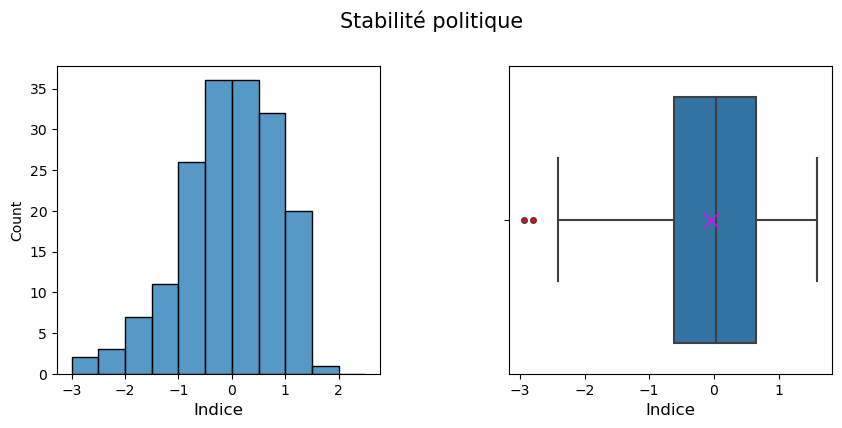

In [116]:
plt.figure(figsize=(10,4))
plt.suptitle('Stabilité politique',y=1.02,size=15)

plt.subplot(121)
sns.histplot(data=join3,x='Stabi poli',bins=np.arange(-3,3,0.5))
plt.xlabel('Indice',fontsize=12)

plt.subplot(122)
sns.boxplot(data=join3,x='Stabi poli',showmeans=True,flierprops=flierprops,meanprops=meanprops)
plt.xlabel('Indice',fontsize=12)

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

Ici, on a affaire à une variable avec des valeurs négatives et postivies avec 0 comme indice neutre. On a une distribution décroissance des 2 cotés à partir de 0 avec par contre des valeurs extrêmes plus importantes du coté négatif (où les 2 seuls outliers se trouvent) 

In [117]:
join3.nlargest(10,'Stabi poli')

,Pays,Population,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist
111,Nouvelle-Zélande,4702.034,5062.0,128.0,0.280373,1.60,42218.5,18540.082537,3.634000
34,Chine - RAS de Macao,622.585,120.0,106.0,2.254851,1.43,126144.0,9614.592906,2.750901
73,Islande,334.393,139.0,98.0,-0.053599,1.35,55638.5,2235.750569,3.287802
89,Luxembourg,591.910,105.0,99.0,1.835926,1.33,114986.0,287.972186,3.924704
146,Suisse,8455.804,91.0,102.0,1.045885,1.26,69103.6,490.305157,3.943579
96,Malte,437.933,101.0,91.0,1.554513,1.25,43559.3,1746.387903,2.939628
46,Dominique,71.458,99.0,91.0,1.146313,1.20,11341.3,6825.451890,2.750901
138,Samoa,195.352,102.0,100.0,3.901249,1.18,6486.1,16083.468551,2.750901
109,Norvège,5296.326,97.0,94.0,2.576809,1.17,64050.8,1344.019375,3.716082
22,Brunéi Darussalam,424.473,188.0,68.0,2.818880,1.16,60994.5,11202.000000,2.750901


In [118]:
join3.nsmallest(10,'Stabi poli')

,Pays,Population,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist
165,Yémen,27834.819,92.0,84.0,5.739614,-2.94,2300.0,5311.607947,2.750901
0,Afghanistan,36296.113,72.0,80.0,5.536005,-2.80,2058.4,5594.223377,2.045641
116,Pakistan,207906.209,151.0,69.0,5.100470,-2.41,5091.1,6138.327507,2.671609
71,Iraq,37552.781,196.0,113.0,-0.206826,-2.31,10526.4,3866.519023,2.164951
128,République centrafricaine,4596.023,178.0,108.0,2.717903,-2.01,912.8,5165.367179,2.750901
108,Nigéria,190873.244,3549.0,80.0,18.878006,-2.00,5190.4,4700.791412,2.579045
144,Soudan,40813.397,39.0,101.0,56.211376,-1.98,4598.9,4601.584868,2.480204
95,Mali,18512.430,118.0,93.0,3.098074,-1.91,2246.8,4126.408658,2.546537
160,Ukraine,44487.709,173.0,63.0,17.829880,-1.87,11860.6,2029.964144,2.783342
159,Turquie,81116.450,558.0,34.0,8.757747,-1.79,27913.8,2258.537538,3.286847


Les pays avec une stabilité très négatives seront forcément omis du choix final, sinon rien à dire de particulier sur ces classements

### PIB hab

In [119]:
join3['PIB hab'].describe()

count       174.000000
mean      20612.897701
std       21142.008589
min         912.800000
25%        4940.425000
50%       13509.500000
75%       29294.225000
max      126144.000000
Name: PIB hab, dtype: float64

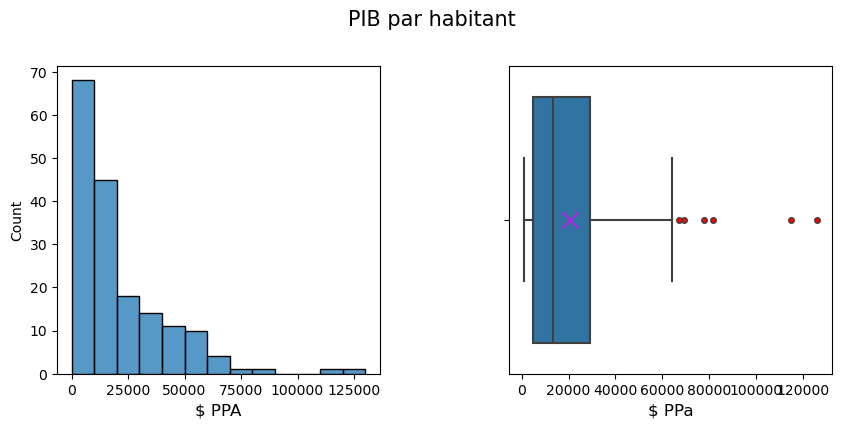

In [120]:
plt.figure(figsize=(10,4))
plt.suptitle('PIB par habitant',y=1.02,size=15)

plt.subplot(121)
sns.histplot(data=join3,x='PIB hab',bins=np.arange(0,140000,10000))
plt.xlabel('$ PPA',fontsize=12)

plt.subplot(122)
sns.boxplot(data=join3,x='PIB hab',showmeans=True,flierprops=flierprops,meanprops=meanprops)
plt.xlabel('$ PPa',fontsize=12)

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

On a une distribution positive, décalée vers la gauche et décroissante

La majorité se situe entre 0 et 40k et il y a seulement 6 outliers au dessus de 65k

In [121]:
join3.nlargest(10,'PIB hab')

,Pays,Population,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist
34,Chine - RAS de Macao,622.585,120.0,106.0,2.254851,1.43,126144.0,9614.592906,2.750901
89,Luxembourg,591.910,105.0,99.0,1.835926,1.33,114986.0,287.972186,3.924704
18,Bermudes,63.049,106.5,96.0,2.514507,1.00,81835.0,5757.850396,2.750901
72,Irlande,4753.279,87.0,101.0,-1.693222,1.00,77749.2,780.840481,3.652443
146,Suisse,8455.804,91.0,102.0,1.045885,1.26,69103.6,490.305157,3.943579
169,Émirats arabes unis,9487.203,93.0,104.0,7.225971,0.62,67183.6,5251.803242,3.950883
109,Norvège,5296.326,97.0,94.0,2.576809,1.17,64050.8,1344.019375,3.716082
22,Brunéi Darussalam,424.473,188.0,68.0,2.818880,1.16,60994.5,11202.000000,2.750901
171,États-Unis d'Amérique,325084.756,91.0,98.0,1.049947,0.29,59914.8,5852.736948,3.941086
33,Chine - RAS de Hong-Kong,7306.322,97.0,105.0,1.955990,0.83,59842.2,9645.855848,3.994552


In [122]:
join3.nsmallest(11,'PIB hab')

,Pays,Population,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist
128,République centrafricaine,4596.023,178.0,108.0,2.717903,-2.01,912.8,5165.367179,2.750901
107,Niger,21602.382,37.0,160.0,8.254497,-1.27,1163.2,3918.848930,2.315975
133,République populaire démocratique de Corée,25429.825,99.0,65.0,2.717903,-0.50,1235.0,8765.000000,2.750901
103,Mozambique,28649.018,110.0,126.0,-1.481791,-0.93,1283.7,8815.865950,2.750901
93,Malawi,17670.196,130.0,119.0,7.558948,-0.25,1472.1,7617.569434,2.750901
87,Libéria,4702.226,137.0,106.0,8.032461,-0.33,1564.2,4877.000397,2.216957
91,Madagascar,25570.512,106.5,96.0,14.327203,-0.30,1584.4,8737.570231,2.272320
151,Tchad,15016.753,55.0,99.0,2.843045,-1.29,1587.0,4240.192773,2.292226
141,Sierra Leone,7488.423,96.0,105.0,17.495292,-0.04,1633.7,4706.993623,2.052701
62,Guinée-Bissau,1828.145,167.0,89.0,-0.618694,-0.50,1925.2,4424.558079,2.380340


Dans le haut du classement, on a 2 leaders à plus de 110k, le 3ème étant à 80k, mis à part les États-Unis , les pays ont une population relativement faible pour certains (moins de 10M) voir très faible (moins de 1M). On remarque également que tous ces pays ont une stabilité politique postive

Dans le bas du classement, on a des valeurs très faible (sous les 2k pour 11 pays) et ont tous une stabilité négative

### Distance

In [123]:
join3['Distance'].describe()

count      174.000000
mean      6082.766208
std       3925.642043
min          0.000000
25%       3015.079493
50%       5605.770616
75%       8799.497226
max      18540.082537
Name: Distance, dtype: float64

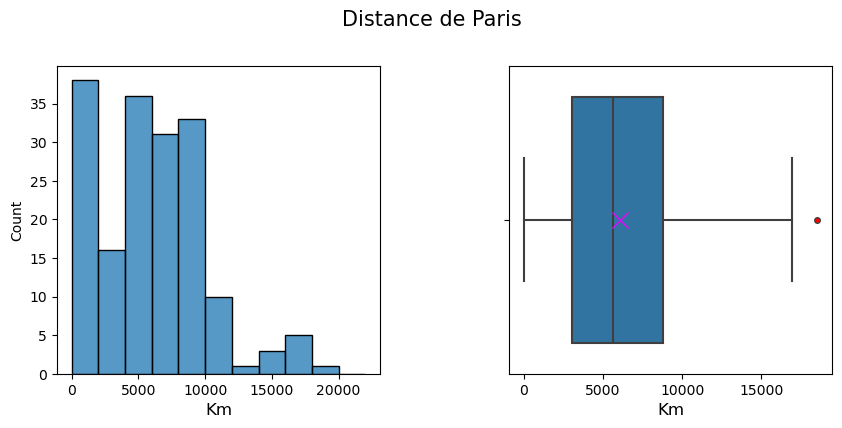

In [124]:
plt.figure(figsize=(10,4))
plt.suptitle('Distance de Paris',y=1.02,size=15)

plt.subplot(121)
sns.histplot(data=join3,x='Distance',bins=np.arange(0,22500,2000))
plt.xlabel('Km',fontsize=12)

plt.subplot(122)
sns.boxplot(data=join3,x='Distance',showmeans=True,flierprops=flierprops,meanprops=meanprops)
plt.xlabel('Km',fontsize=12)

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

Peu de choses à dire sur la distribution à part qu'il n'y a très peu de pays au delà des 12k avec notamment un seul outlier

Pour le coup, il n'est pas forcément intéressant de regarder les classements de cette variable

### Perf logist

In [125]:
join3['Perf logist'].describe()

count    174.000000
mean       2.871851
std        0.512100
min        1.913048
25%        2.534479
50%        2.750901
75%        3.082895
max        4.212983
Name: Perf logist, dtype: float64

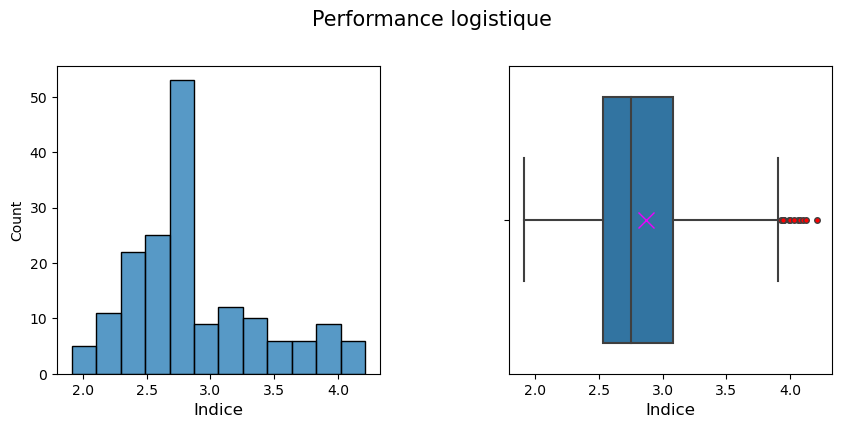

In [126]:
plt.figure(figsize=(10,4))
plt.suptitle('Performance logistique',y=1.02,size=15)

plt.subplot(121)
sns.histplot(data=join3,x='Perf logist')
plt.xlabel('Indice',fontsize=12)

plt.subplot(122)
sns.boxplot(data=join3,x='Perf logist',showmeans=True,flierprops=flierprops,meanprops=meanprops)
plt.xlabel('Indice',fontsize=12)

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

Ici on a une variable positive mais variant quasiement de 2 à 4 (au delà se trouve les outliers), avec une majorité comprise entre 2.5 et 3.2

In [127]:
join3.nlargest(10,'Perf logist')

,Pays,Population,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist
4,Allemagne,82658.409,112.0,95.0,2.616279,0.59,53071.5,880.634838,4.212983
148,Suède,9904.896,112.0,92.0,2.306442,0.98,51948.0,1547.146570,4.127296
119,Pays-Bas,17021.347,123.0,114.0,2.232981,0.92,55088.6,430.886817,4.103765
16,Belgique,11419.748,125.0,83.0,2.240471,0.43,50442.3,264.600808,4.074269
11,Autriche,8819.901,94.0,98.0,1.955034,1.05,54173.0,1036.711400,4.063993
126,Royaume-Uni de Grande-Bretagne et d'Irlande du...,66727.461,103.0,89.0,3.665988,0.39,46372.4,344.136719,4.029834
77,Japon,127502.725,110.0,96.0,3.754016,1.11,41444.2,9736.095008,4.000232
33,Chine - RAS de Hong-Kong,7306.322,97.0,105.0,1.955990,0.83,59842.2,9645.855848,3.994552
169,Émirats arabes unis,9487.203,93.0,104.0,7.225971,0.62,67183.6,5251.803242,3.950883
52,Finlande,5511.371,118.0,89.0,1.512813,1.08,47570.1,1913.222367,3.945373


In [128]:
join3.nsmallest(10,'Perf logist')

,Pays,Population,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist
65,Haïti,10982.366,108.0,100.0,11.669193,-0.67,3153.3,7365.019671,1.913048
0,Afghanistan,36296.113,72.0,80.0,5.536005,-2.80,2058.4,5594.223377,2.045641
141,Sierra Leone,7488.423,96.0,105.0,17.495292,-0.04,1633.7,4706.993623,2.052701
99,Mauritanie,4282.570,115.0,89.0,3.057412,-0.63,5108.5,3791.854583,2.098000
167,Zimbabwe,14236.595,75.0,122.0,6.115108,-0.71,3795.6,7914.128381,2.101204
5,Angola,29816.766,100.0,96.0,18.103539,-0.38,7310.9,6478.953877,2.145592
84,Lesotho,2091.534,59.0,149.0,7.228800,-0.19,2668.3,9011.896798,2.152991
71,Iraq,37552.781,196.0,113.0,-0.206826,-2.31,10526.4,3866.519023,2.164951
55,Gabon,2064.823,98.0,93.0,-1.046697,-0.10,15006.8,5413.107943,2.175825
150,Tadjikistan,8880.268,33.0,95.0,7.201001,-0.67,3252.9,5300.768490,2.201372


Logiquement dans le haut du classement on a des pays "riches" avec un PIB par habitant élevé et une stabilité positive et dans le bas du classement des pays "pauvres" avec un PIB par habitant faible et une stabilité politique négative 

## <font color ='green'> Analyse Bivariée 

Dans cette partie, l'objectif est déceler des liens entre les variables. On a déjà pu voir dans la partie précédente que certaines variables semblaient être corrélées, on va pouvoir regarder et confirmer ceci avec la matrice de corrélation.

Ensuite on regardera des scatter plots entre certaines variables 

In [129]:
join_corr = join.corr(method='spearman')
def rg(val):
    
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

join_corr_rg = join_corr.style.applymap(rg).applymap(lambda v: 'opacity: 70%;' if (v < 0.7) and (v > -0.7) else None
                                          ).applymap(lambda v: 'opacity: 40%;' if (v < 0.4) and (v > -0.4) else None
                                          ).applymap(lambda v: 'opacity: 20%;' if (v < 0.2) and (v > -0.2) else None)
join_corr_rg

,Population,DI vol,Nour vol,Prod vol,Import vol,Export vol,% DI vol,% Nour vol,% Prod vol,% Import vol,% Export vol,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist
Population,1.000000,0.782259,0.785017,0.783251,0.189586,0.357509,-0.263790,-0.221803,0.172710,-0.469472,0.262442,-0.013727,-0.026985,0.197030,-0.524412,-0.126579,-0.027774,0.147628
DI vol,0.782259,1.000000,0.998208,0.940019,0.486769,0.644521,0.214629,0.292108,0.549254,-0.214934,0.567580,-0.044846,-0.073194,0.043772,-0.222010,0.282885,-0.059050,0.358783
Nour vol,0.785017,0.998208,1.000000,0.939384,0.489754,0.652207,0.208860,0.288759,0.549046,-0.213971,0.575235,-0.046436,-0.066954,0.054265,-0.223982,0.284472,-0.066956,0.361946
Prod vol,0.783251,0.940019,0.939384,1.000000,0.321059,0.665660,0.088523,0.198122,0.586171,-0.403508,0.580512,-0.045283,-0.045800,0.037801,-0.219028,0.270815,-0.087411,0.419397
Import vol,0.189586,0.486769,0.489754,0.321059,1.000000,0.534688,0.400533,0.362705,0.341043,0.573344,0.511122,0.009950,-0.093387,-0.076986,0.178721,0.411053,-0.233711,0.294695
Export vol,0.357509,0.644521,0.652207,0.665660,0.534688,1.000000,0.230886,0.315212,0.492141,-0.038990,0.964014,-0.031791,-0.083364,-0.084492,0.212879,0.622399,-0.280320,0.648898
% DI vol,-0.263790,0.214629,0.208860,0.088523,0.400533,0.230886,1.000000,0.884328,0.608728,0.492372,0.275069,-0.064508,0.014333,-0.151081,0.326927,0.456011,0.057795,0.208622
% Nour vol,-0.221803,0.292108,0.288759,0.198122,0.362705,0.315212,0.884328,1.000000,0.593395,0.404849,0.321031,-0.096048,-0.014803,-0.130496,0.350813,0.474433,0.170682,0.241717
% Prod vol,0.172710,0.549254,0.549046,0.586171,0.341043,0.492141,0.608728,0.593395,1.000000,-0.048231,0.528658,-0.116002,-0.001763,-0.103890,0.112801,0.470294,-0.096267,0.354633
% Import vol,-0.469472,-0.214934,-0.213971,-0.403508,0.573344,-0.038990,0.492372,0.404849,-0.048231,1.000000,-0.004325,0.091637,-0.043799,-0.006724,0.293619,0.103294,-0.013922,-0.083024


<AxesSubplot:title={'center':'Matrice de corrélation'}>

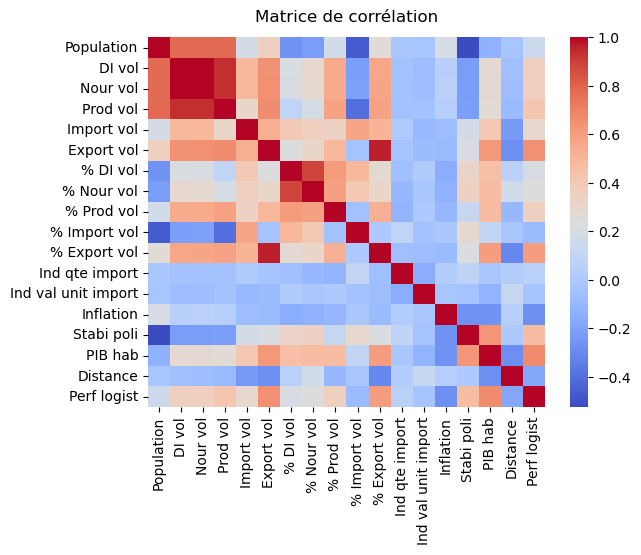

In [130]:
plt.figure()
plt.title('Matrice de corrélation',y=1.02)

sns.heatmap(join_corr, xticklabels = join_corr.columns, yticklabels = join_corr.columns, cmap = 'coolwarm')

On peut noter déjà quelques corrélations entre certaines variables :

On peut noter la présence d'un carré rougeâtre pour les variables en quantité de la disponibilité alimentaire de volailles (hors variation de stock)

Corrélation très forte (> 0.9) :

- DI et Prod
- DI et Nourriture
- Prod et Nourriture
- Export et % export


Corrétation forte  (entre 0.7 et 0.9) :


- DI et Population
- Nourriture et Population
- Prod et Population
- % DI et % nourriture

Corrélation modérée (entre 0.4 et 0.7) : Il y a 36 couples de variables, par conséquent, je ne listerai uniquement ceux au dessus de 0.6 :

- DI et Export
- Export et Nour
- Export et Prod
- Export et PIB hab
- Export et Perf logist
- % DI et % Prod
- % Export et PIB hab
- % Export et Perf logist
- Stabi poli et PIB hab
- PIB hab et Perf logist

A noter que toutes les corrélations situés au dessus sont positives. Également on a un groupe de variables qui se détache avec des corrélations fortes ou très fortes : 'Population', 'DI vol', 'Nour vol' et 'Prod vol' (voire 'Export vol' mais avec des corrélations tout de même plus faible). On a peut aussi noter un petit groupe avec 'Stabi poli', 'PIB hab' et 'Perf Logist'

Également on peut regarder quelques nuages de points entre couple de variables. Vu le nombre de variables je ne vais pas tous les regarder, on va s'en tenir aux groupes de variables + les variables de quantités avec la population

<Figure size 400x400 with 0 Axes>

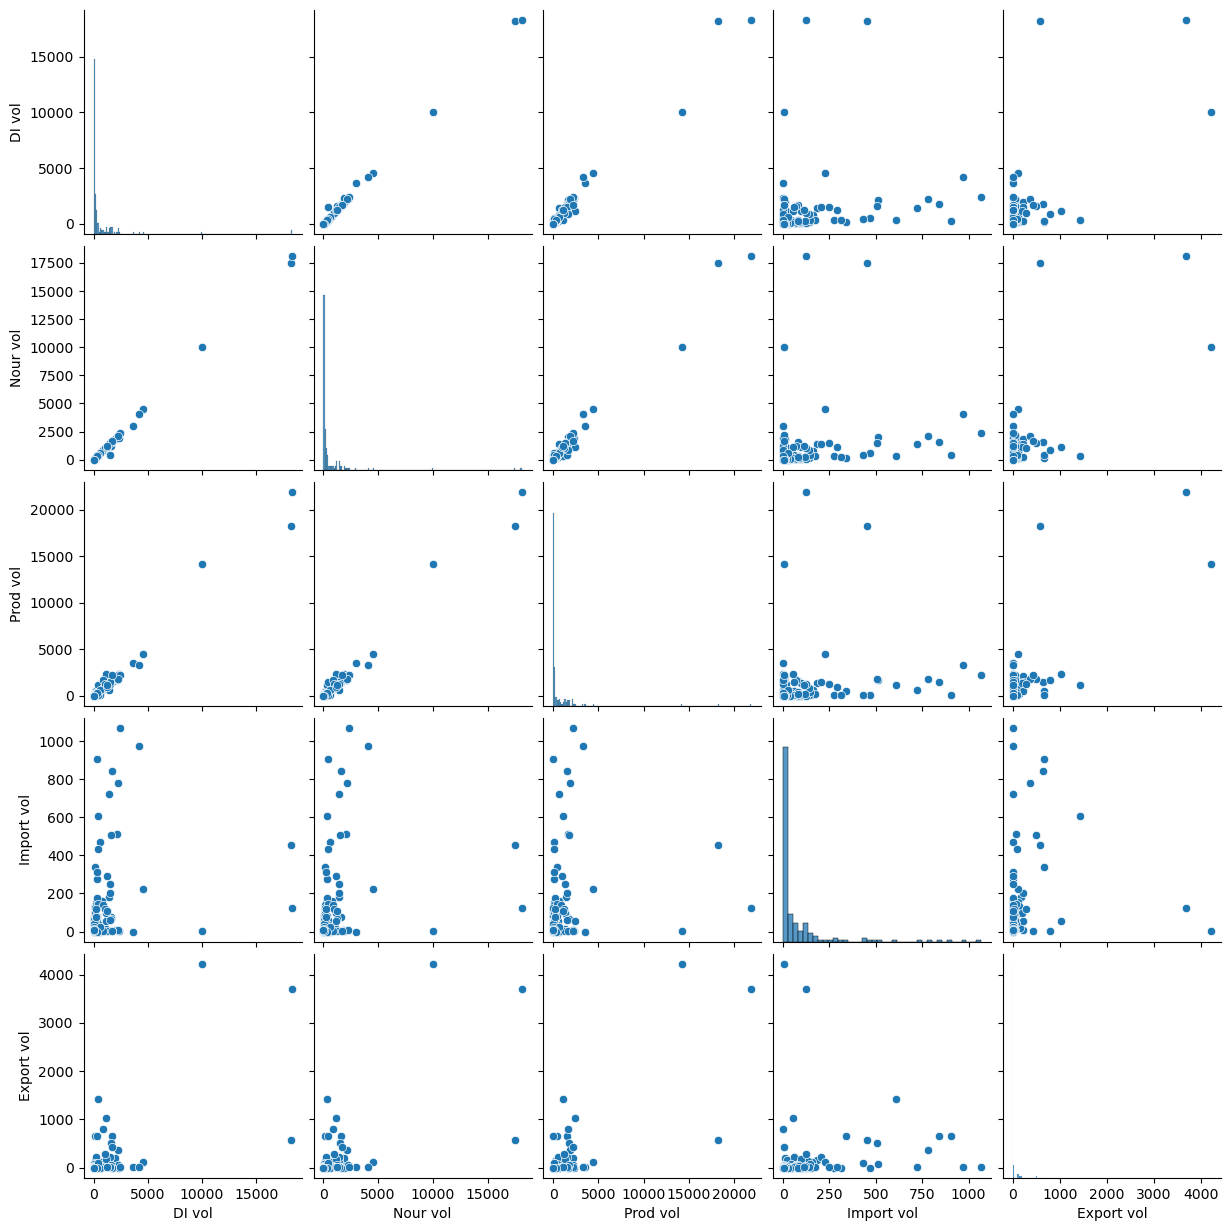

In [113]:
plt.figure(figsize=(4,4))

sns.pairplot(join1)

plt.show()

On retrouve pour DI, Nour et Prod la très forte corrélation positive avec une droite linéaire facilement imaginable

<Figure size 600x600 with 0 Axes>

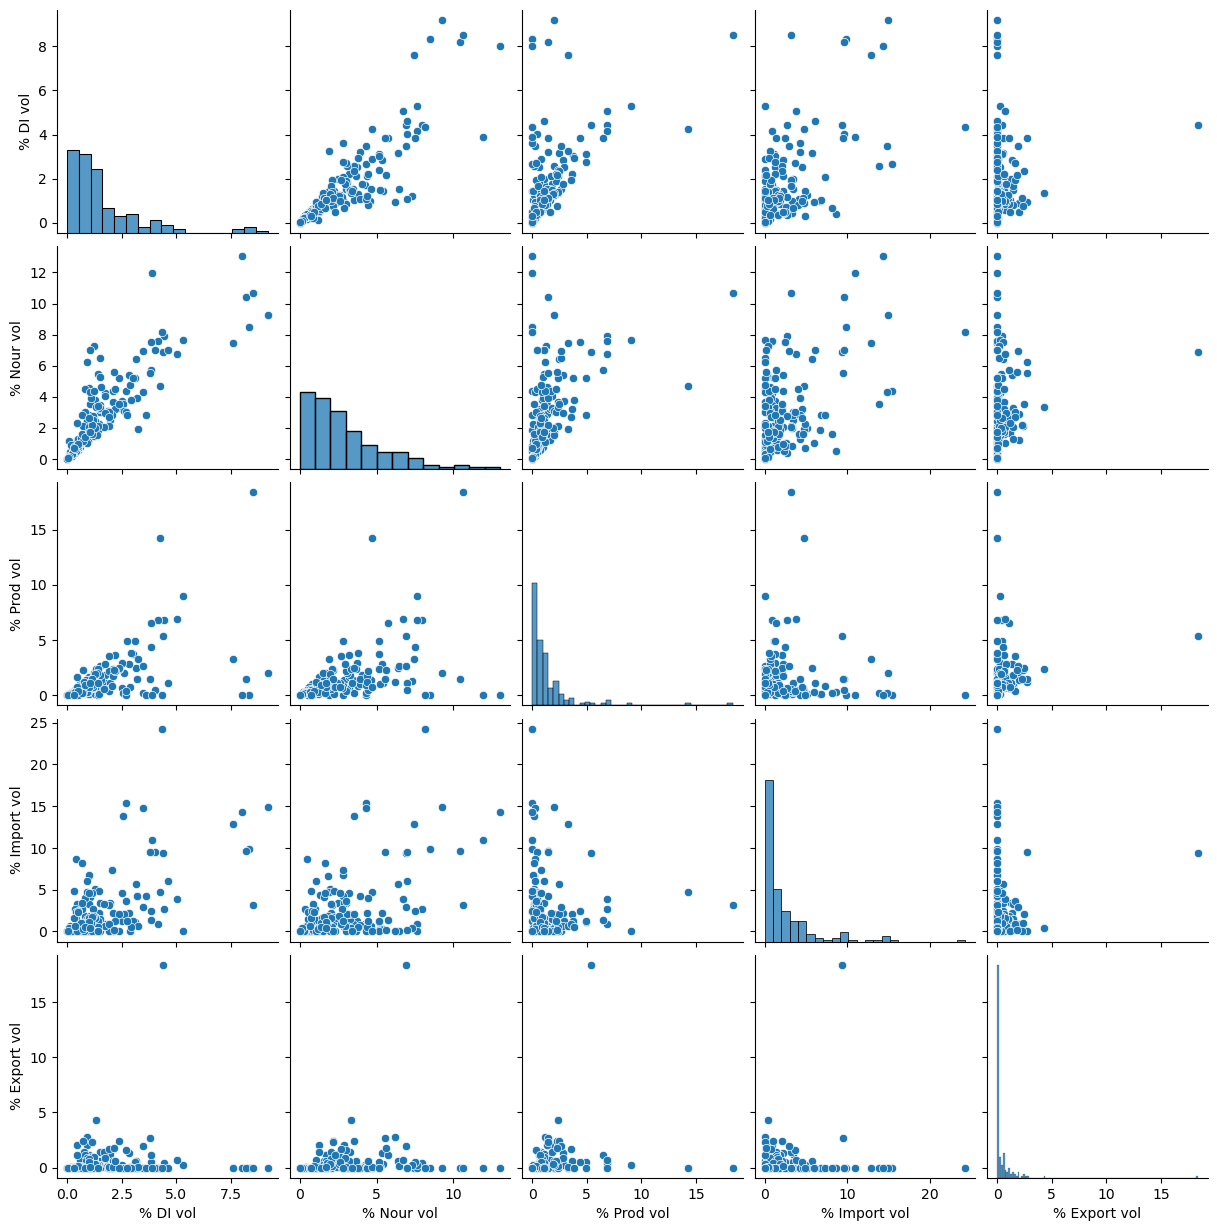

In [133]:
plt.figure(figsize=(6,6))

sns.pairplot(join2)

plt.show()

On retrouve une forte corrélation positive pour % DI et % Nour et dans un degré moindre % DI et % Prod avec quelques exceptions pour des % DI très élevés 

<Figure size 640x480 with 0 Axes>

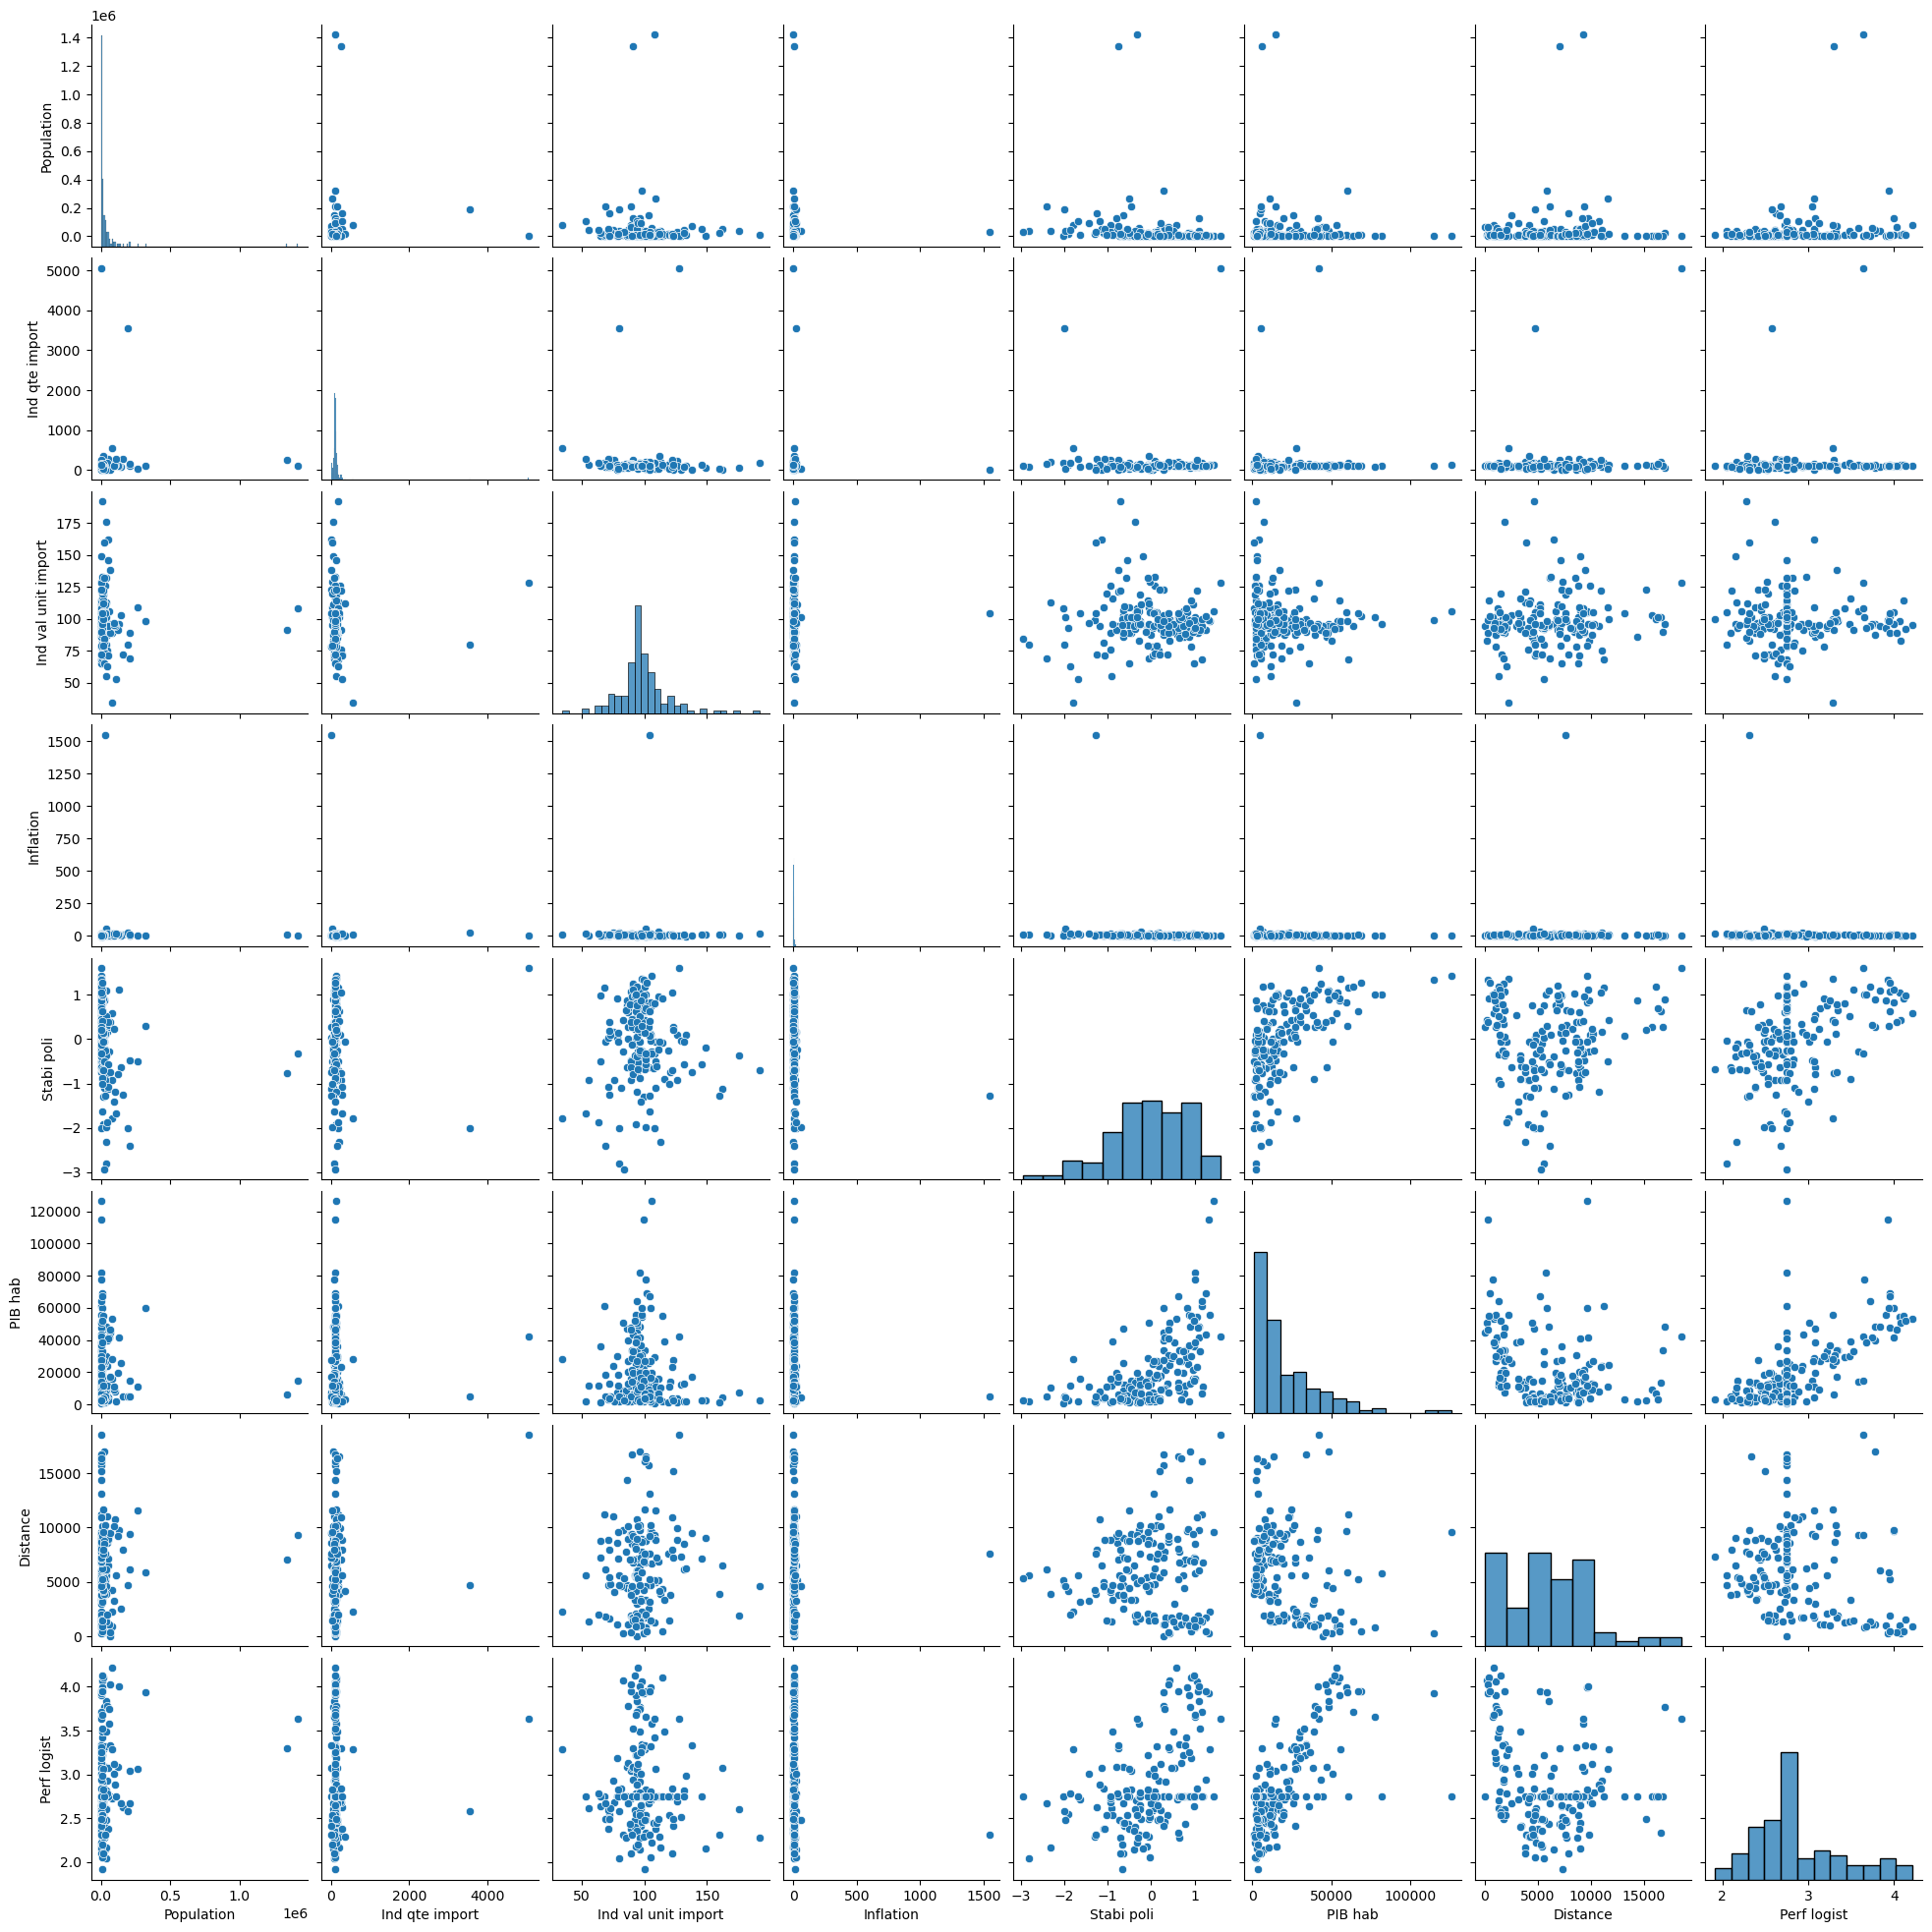

In [134]:
plt.figure()

sns.pairplot(join3)

plt.show()

Ici on aperçoit une bonne corrélation entre PIB hab et Perf logist

On peut voir aussi que beaucoup de graphique ont des barres de points verticales ou horizontales dûs à des outliers

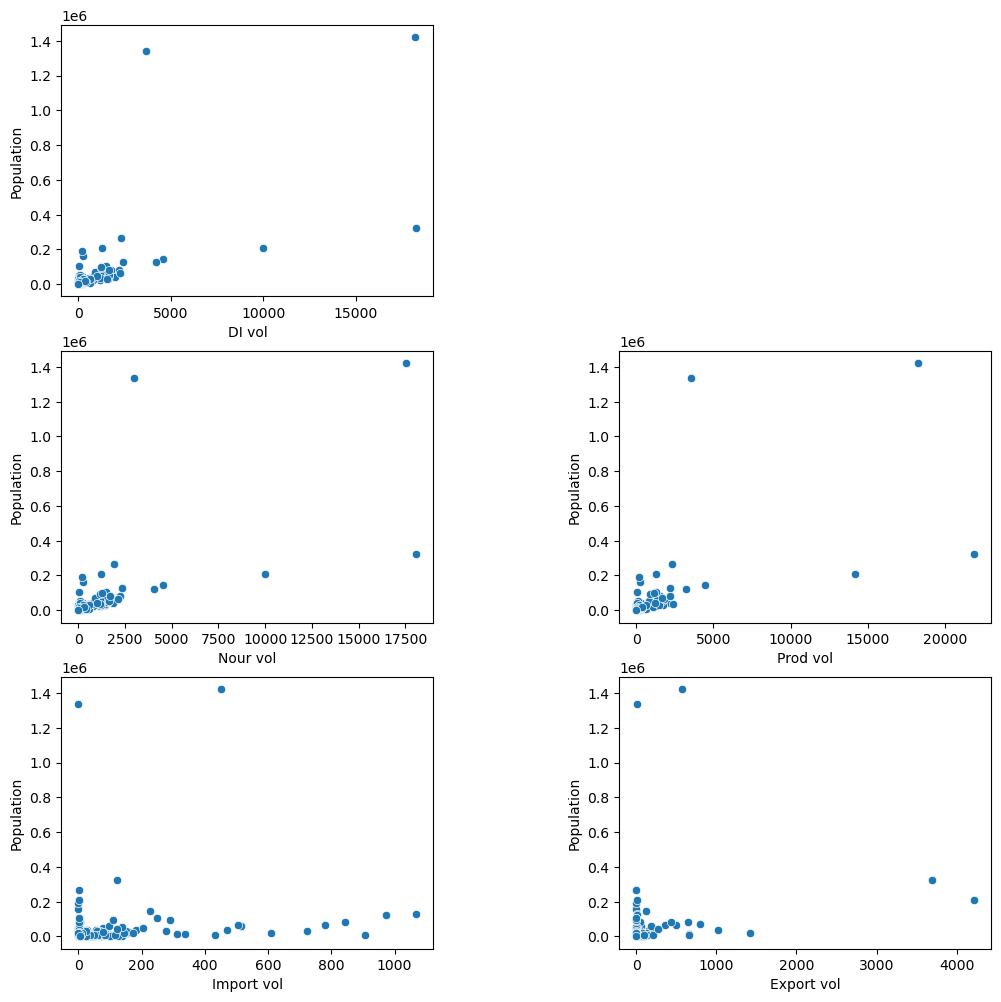

In [135]:
plt.figure(figsize=(12,12))

plt.subplot(321)
sns.scatterplot(data=join,x='DI vol',y='Population')

plt.subplot(323)
sns.scatterplot(data=join,x='Nour vol',y='Population')

plt.subplot(324)
sns.scatterplot(data=join,x='Prod vol',y='Population')

plt.subplot(325)
sns.scatterplot(data=join,x='Import vol',y='Population')

plt.subplot(326)
sns.scatterplot(data=join,x='Export vol',y='Population')

plt.subplots_adjust(wspace=0.5)
plt.show()

Les graphiques se ressemblent un peu tous (sauf celui avec Import) avec un ensemble de points dans le coin en bas à gauche et 4 points isolés qui se distinguent

Je vais maintenant passer à la partie 2 consacrée aux méthodes de clustering

In [137]:
join.to_csv("C:\\Users\\narab\\OneDrive\\Documents\\OpenClassRooms\\Projet 9\\bdd.csv", index=False)